# DSC 170 Final Project: An Analysis of United States Housing

Team member names:
- Jayson Leach (A16469391)
- Sheena Patel (A16641602)

## Questions addressed:

Our goal is to identify locations in the US that are most suitable for homebuyers, particularly those likely to relocate in the near future given our data has been extracted throughout the past 5 years. We aim to offer a comprehensive understanding of the housing market landscape using common factors people consider when purchasing a home for people who don't know where to begin. This could empower first-time homebuyers such as recent college graduates and individuals early in their careers to make better informed decisions. To adequately analyze the hosuing market landscape we will address the following key questions:

- **Where in the US is it most affordable to live?**: We delve into housing affordability metrics, considering factors such as median home prices, cost of living indices, and trends in rental rates to pinpoint areas where housing is most affordable to align with our audience's financial needs.

- **Which areas have the best balance between affordability and other important factors?**: We recognizing that affordability is just one aspect of the home-buying equation, so we will assess additional factors such as weather, job opportunities, quality of education, access to healthcare, transportation infrastructure, and crime rate. By incorporating various factors, we present locations that offer a well-rounded living experience.

- **Do certain factors, such as income and crime rate, follow geographical patterns?**: Finally, we want to investigate potential geographical trends involving income distribution, employment opportunities, crime rates, and other socio-economic indicators. This insight aids homebuyers in understanding regional nuances and making decisions aligned with their preferences and safety concerns.

For a nuanced analysis, we aim to personalize recommendations based on individual preferences, ensuring that each homebuyer's unique needs are met depending on their what is most important to them. By providing these insights and most suitable locations for living in the US, we aim to empower our audience as they embark on their homeownership journey with more confidence and clarity.

(250 words)

## Background and literature:
First, we plan to conduct our data exploration to find regions that may be preferred to live for homebuyers. We will dive deeper into the validity of our findings by checking online census comparisons. If we find concentrations of certain factors such as crime rates, we want to utilize sources online to explain why crime may or may not be higher in those regions and provide justification to our findings. 

Here are some sources we could begin with (subject to change depending on our project results): 
- https://www.census.gov/quickfacts/fact/table/CA,US/RHI225222 : This source helps us compare numerous statistics based on an input state and country. It will be helpful in looking close
- https://www.fortunebuilders.com/best-places-to-buy-a-house/ : Article that specifies 10 best places to buy a home and why. This will potentially cross-validate for our final analysis. 

Before selecting our data, we relied on articles, like [this from Money Crashers](https://www.moneycrashers.com/where-should-i-live-decide-best-places/), to inform us on what criteria homebuyers use when searching for places to live. This helped us identify factors like climate, crime, commute times, and education quality in addition to the logical financial incentives like job opportunities, housing cost, cost of living, etc. Though some of these factors did not make it into our analyses, it did help us narrow our search on what data to search for a look into.

By professor recommendation, we investigated existing data analysis by [Redfin](https://www.redfin.com/news/data-center/). This investigation led us to consider entirely new factors. Redfin has extensive data on job opportunities and provides job opportunity scores to metropolitan areas by the field of work. Additionally, they also have data on market competitiveness, which is something we did not consider. Some places have more people looking to buy homes than others. Our investigation of Redfin housing market data allowed us to see the vast number of directions we could take this project.

(200 words)

## Python libraries or ArcGIS modules

Main libraries used: 
- **GeoPandas / Pandas:** 
    - Enables manipulation and analysis of dataframes and geospatial data.
- **ArcGIS:**
    - Allows interaction with spatial data and leveraging the powerful geoprocessing tools of ArcGIS for in-depth analysis.
- **Cenpy:**
    - Python library for accessing data from the U.S. Census Bureau's APIs (Application Programming Interfaces)
- **Matplotlib.pyplot:**
    - used for data visualization tasks and creating plots

(100 words)

In [1]:
# imports
import pandas as pd
import numpy as np
import os
import geopandas 
import getpass
import geopy
import geopandas as gpd
from arcgis.gis import GIS
import matplotlib.pyplot as plt
import cenpy
import time

# warnings
import warnings
warnings.filterwarnings('ignore')

/Users/sheenapatel/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sheenapatel/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# GIS login
username = input('Enter username: ')
password = getpass.getpass("Enter password: ")
gis = GIS(username=username, password=password)

## Data Cleaning

### Data Sources Investigated

- [Esri Updated Demographics Variables 2023](https://ucsdonline.maps.arcgis.com/home/item.html?id=ddd1510ed1964e2e8fb1ded93e9b03b1): This dataset contains over 150 popular demographic metrics by areas as small as census tracts. We plan to explore the data and use metrics such as: 
    - Housing Affordability Index
    - Unemployment Rate
    - Median Home Value
    - Vacancy
    - Income Growth
    - Education
    - Crime Rate
    
- [World Historical Climate Monthly Averages 1981-2010](https://ucsdonline.maps.arcgis.com/home/item.html?id=ed59d3b4a8c44100914458dd722f054f): This dataset contains the average monthly temperature over 30 years at various locations globally.
    - Weather
    
- [County Health Rankings 2029](https://ucsdonline.maps.arcgis.com/home/item.html?id=4dc9f89d893b40cf85e4fd59e5a444f0): This dataset provides weighted ranking of numerous health factors by state and conunty
    - Crime Rate
    - Education
    
<!-- - [Mean Commute Time by State 2022](https://www.census.gov/csrm/comparisons/sorted-list.html): This dataset by the US Census contains the mean travel time to work in minutes by state from 2022.
-  -->

### Get Esri Demographics  2023 data
> dem_gdf

<Item title:"Esri Updated Demographics Variables 2023" type:Feature Layer Collection owner:esri_demographics>
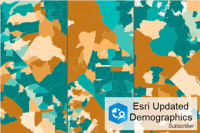

In [3]:
# Extract Esri Demographic Variables 2023
dem_id = 'ddd1510ed1964e2e8fb1ded93e9b03b1'
dem = gis.content.get(dem_id)
display(dem)

# Access the feature layer at county level for efficiency reasons
dem_layer = dem.layers[3]
dem_sdf = dem_layer.query().sdf
# Convert sdf to geodataframe
dem_gdf = geopandas.GeoDataFrame(dem_sdf, geometry= dem_sdf['SHAPE'], crs="EPSG:3857")
# Change crs for better visuals
dem_gdf = dem_gdf.to_crs('epsg:4326')

- Changed CRS from Web Mercater Projection (3857) to Geographic (4326) that use latitude and longitude coordinates
- Created a geodataframe with all demographics and shape data: dem_gdf

### Get Historical Temperature Averages Data
>  temp_gdf

<Item title:"World Historical Climate - Monthly Averages for GHCN-D Stations for 1981 - 2010" type:Feature Layer Collection owner:esri_observations>
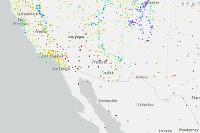

In [4]:
# Get Historical Temperature Averages
temp_id = 'ed59d3b4a8c44100914458dd722f054f'
temp = gis.content.get(temp_id)
display(temp)

# Access the feature layer
temp_layer = temp.layers[0]
temp_sdf = temp_layer.query().sdf

# Convert to geodataframe
temp_gdf = geopandas.GeoDataFrame(temp_sdf, geometry= temp_sdf['SHAPE'], crs="EPSG:4326")
# Filter irrelevant measurement points
temp_gdf = gpd.sjoin(temp_gdf, dem_gdf[['geometry']], how="inner", op="intersects").drop(columns=['index_right'])

- Converted feature layer to Geodatframe called: temp_gdf
- Initialized CRS to be EPSG:4326 for consistent Geographic Projections

In [5]:
# Calculate the yearly average Fahrenheit temperature 
temp_gdf['Year_TAVG_F'] = temp_gdf[['Jan_TAVG_F', 'Feb_TAVG_F', 'Mar_TAVG_F', 'Apr_TAVG_F', 'May_TAVG_F',
                                    'Jun_TAVG_F', 'Jul_TAVG_F', 'Aug_TAVG_F', 'Sep_TAVG_F', 'Oct_TAVG_F',
                                    'Nov_TAVG_F', 'Dec_TAVG_F']].mean(axis=1)
# get the nearest temperature point
def mean_temp_calc(dem):
    distances = temp_gdf.distance(dem.geometry).sort_values()
    nearest_point = temp_gdf.loc[distances.index[0]]
    return nearest_point.Year_TAVG_F
# assign point to county projections
dem_gdf['Year_TAVG_F'] = dem_gdf.apply(mean_temp_calc, axis=1)

- Calculated the yearly average temperature for each location mean aggregating temerature for all monthly columns
- Created a function that found the nearest distace between temp_gdf for each location in dem_gdf and assigned each location its corresponding yearly average temperature from temp_gdf
- Created new column called **'Year_TAVG_F'** in dem_gdf by apply fucnction to all county shapes in dem_gdf and finding their respective yearly average temperaures

### Get Crime Rates and Education Data
> health_gdf

<Item title:"County Health Rankings 2019" type:Feature Layer Collection owner:esri_demographics>
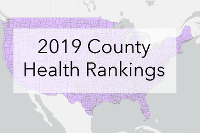

In [6]:
# Get County Health Rankings 2019
id3 = '4dc9f89d893b40cf85e4fd59e5a444f0'
health = gis.content.get(id3)
display(health)

health_layer = health.layers[2]
health_sdf = health_layer.query().sdf
health_gdf = geopandas.GeoDataFrame(health_sdf, geometry= health_sdf['SHAPE'], crs="EPSG:4326")
health_gdf = health_gdf.to_crs('epsg:4326')

In [7]:
# get relevant columns for crime
health_gdf = health_gdf[['OBJECTID', 'FIPS', 'v021_rawvalue', 'v043_rawvalue', 'SHAPE', 'geometry']]
# remove states not in demographic data
health_gdf = health_gdf[health_gdf.FIPS.isin(dem_gdf.ID)]

In [8]:
# fill NA values with means
health_gdf['v043_rawvalue'].fillna(health_gdf['v043_rawvalue'].mean(), inplace=True)
health_gdf['v021_rawvalue'].fillna(health_gdf['v021_rawvalue'].mean(), inplace=True)

# normalize crime column
c_mean = health_gdf['v043_rawvalue'].mean()
c_std = health_gdf['v043_rawvalue'].std()
health_gdf['v043_rawvalue'] = (health_gdf.v043_rawvalue - c_mean) / c_std

# normalize hs graduation column
hs_mean = health_gdf['v021_rawvalue'].mean()
hs_std = health_gdf['v021_rawvalue'].std()
health_gdf['v021_rawvalue'] = (health_gdf.v021_rawvalue - hs_mean) / hs_std

- Replaced missing values in the 'v043_rawvalue' and 'v021_rawvalue' columns with the respective means of each column to ensure completeness and accuracy of the dataset
- Normalized 'v043_rawvalue' and 'v021_rawvalue' by subtracting the mean and dividing by the standard deviation, standardizing the values to a common scale for fair comparison and analysis

In [9]:
# add to dem_gdf
dem_gdf = pd.merge(dem_gdf, health_gdf[['FIPS', 'v021_rawvalue', 'v043_rawvalue']],
         left_on='ID', right_on='FIPS', how="left", sort=False).drop(columns=['FIPS'])

- Merged 'v021_rawvalue' and 'v043_rawvalue' columns from 'health_gdf' into 'dem_gdf' based on a common identifier ('ID' in 'dem_gdf' and 'FIPS' in 'health_gdf')
- Ensuring inclusion of relevant health-related data for homebuying in the demographic dataset. 

- Hollistically combined 3 dataframes into one singular dem_gdf to include various homebuying data per county region in the US and prepare for data visualiztaion

## Descriptive Statistics

Let's identify some variables of interest within our combined dem_gdf: 

- '**Year_TAVG_F**': Self-designed variable of aggregated monthly climate in Fahrenheit to visualize county level
    - This variable will help us identify warm climate regions in the US as well as regions with polarized climate (too hot or too cold) 
- '**VACANT_CY**': An estimate of the number of vacant homes. Vacancy is defined as no one living in the home or occupied entirely by temporary occupants who have usual residence in a different locations. This will be transformed into the percentage of vacant homes by divifing by the total number of homes (TOTHU_CY) to account for differing housing densities.
    - This variable is interesting, because it can be used to gauge the level of home availability. Low vacancy could indicate a competitive housing market.
- '**HAI_CY**': Housing Affordability Index. HAI values greater than 100 indicate increasing affordability; HAI values less than 100 indicate areas where homes are less affordable and median income might be insufficient to purchase a median-valued home. This will be transformed by normalization.
    - This variable is key, because it can be used to gauge whether homes are affordable which is the main target of our investigation.
- '**UNEMPRT_CY'**: An estimate of the unemployment rate of population age 16+. This will be transformed by normalization.
    - This variable is interesting, because it could be a good indicator for wealth and job availability in a specific geographic area. It is also a good tell for the state of the economy in said area.
- '**PCIGRWCYFY**': An estimate for the Per Capita Income Annual Growth Rate between 2023 and 2028. This will be transformed by normalization.
    - This variable is interesting, because it forecasts economic growth for the future. Buying a home is an investment, so choosing a location with a growing economy is important for home value.
- '**v043_rawvalue**' : # of reported violent crime offenses per 100,000 population. Weight into Health Factors Ranking: 25%. Source: Uniform Crime Reporting – FBI. Year(s): 2014 & 2016.
    - This variable helps determine regions in the US that are more safe to live in as they have lower crime rates.
- '**v021_rawvalue**' : % of ninth-grade cohort that graduates in four years. Weight into Health Factors Ranking: 5%. Source: State-specific sources & EDFacts. Year(s): Varies.
    - This variable will help us determine areas with higher high school graduation rates as they are indicative of a well-educated population and may correlate with other positive community attributes.

### Exploring Warm Weather Regions in the US

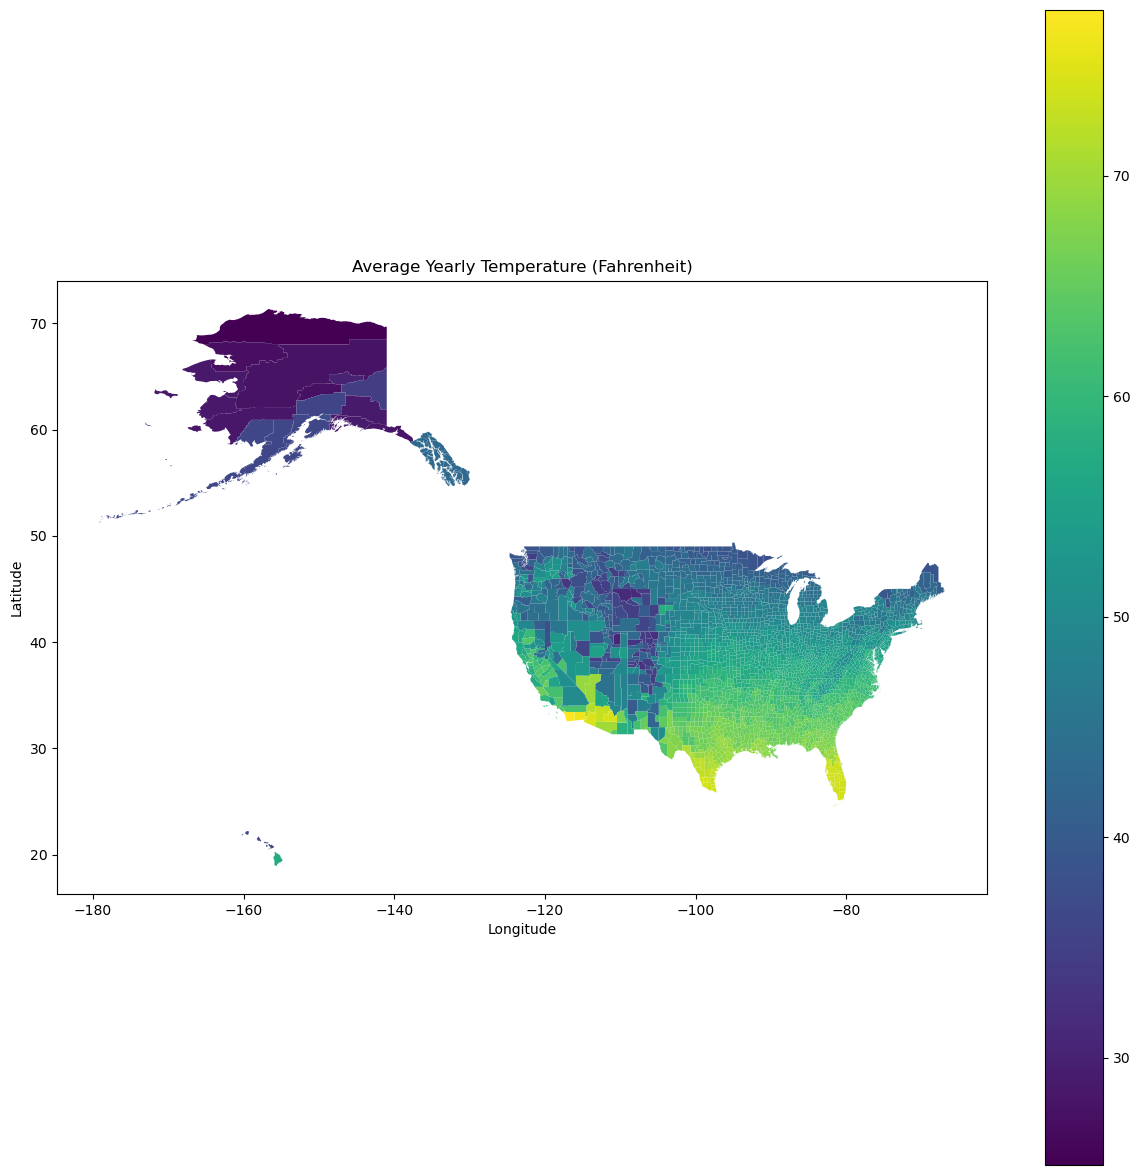

In [10]:
dem_gdf.plot(figsize=(15, 15), column='Year_TAVG_F', legend=True)
plt.title('Average Yearly Temperature (Fahrenheit)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

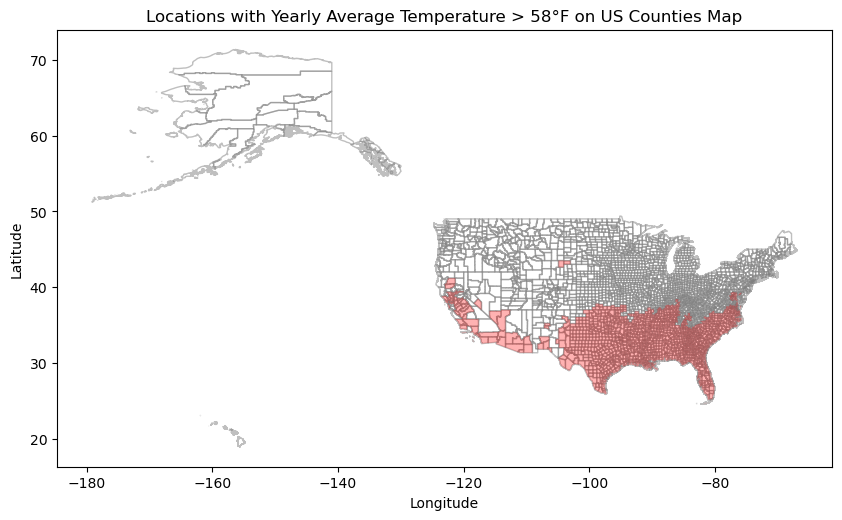

In [11]:
# Define warm locations as average yearly temperature > 58 degrees Fahrenheit
dem_gdf['focus_climate'] = dem_gdf.Year_TAVG_F > 58

# Filter locations where 'Year_TAVG_F' > 58
focus_climate = dem_gdf[dem_gdf['Year_TAVG_F'] > 58]
# Plot all US counties
fig, ax = plt.subplots(figsize=(10, 10))
dem_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5)
# Plot locations with warm weather in red
focus_climate.plot(ax=ax, color='red', alpha=0.3)

plt.title('Locations with Yearly Average Temperature > 58°F on US Counties Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations:
 - **Focus Region**: Southern bordering regions known as the "Sunbelt" have the warmest weather (65-75 degrees)
 - In contrast, Northern regions have the coldest average temperaates (40-45 degrees) 

### Exploring Affordability in the US

<Axes: ylabel='Frequency'>

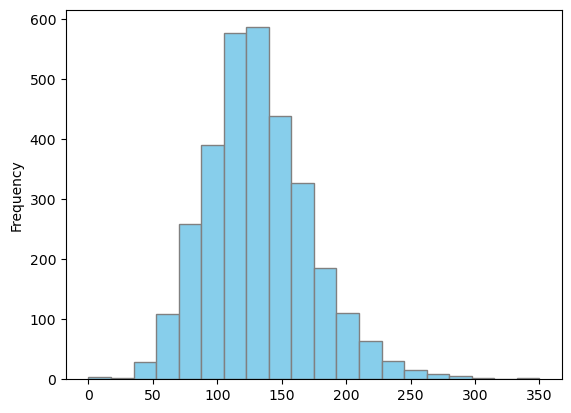

In [12]:
# Determine bins
dem_gdf['HAI_CY'].plot.hist(bins=20, color='skyblue', edgecolor='grey')

In [13]:
# Change so negative is less affordable and positive is more affordable
dem_gdf['HAI_CY'] = dem_gdf.HAI_CY.apply(float) - 100
# Adding binary HAI
dem_gdf['HAI_B'] = dem_gdf.HAI_CY > 0

In [14]:
dem_gdf.HAI_CY.mean()

31.485523385300667

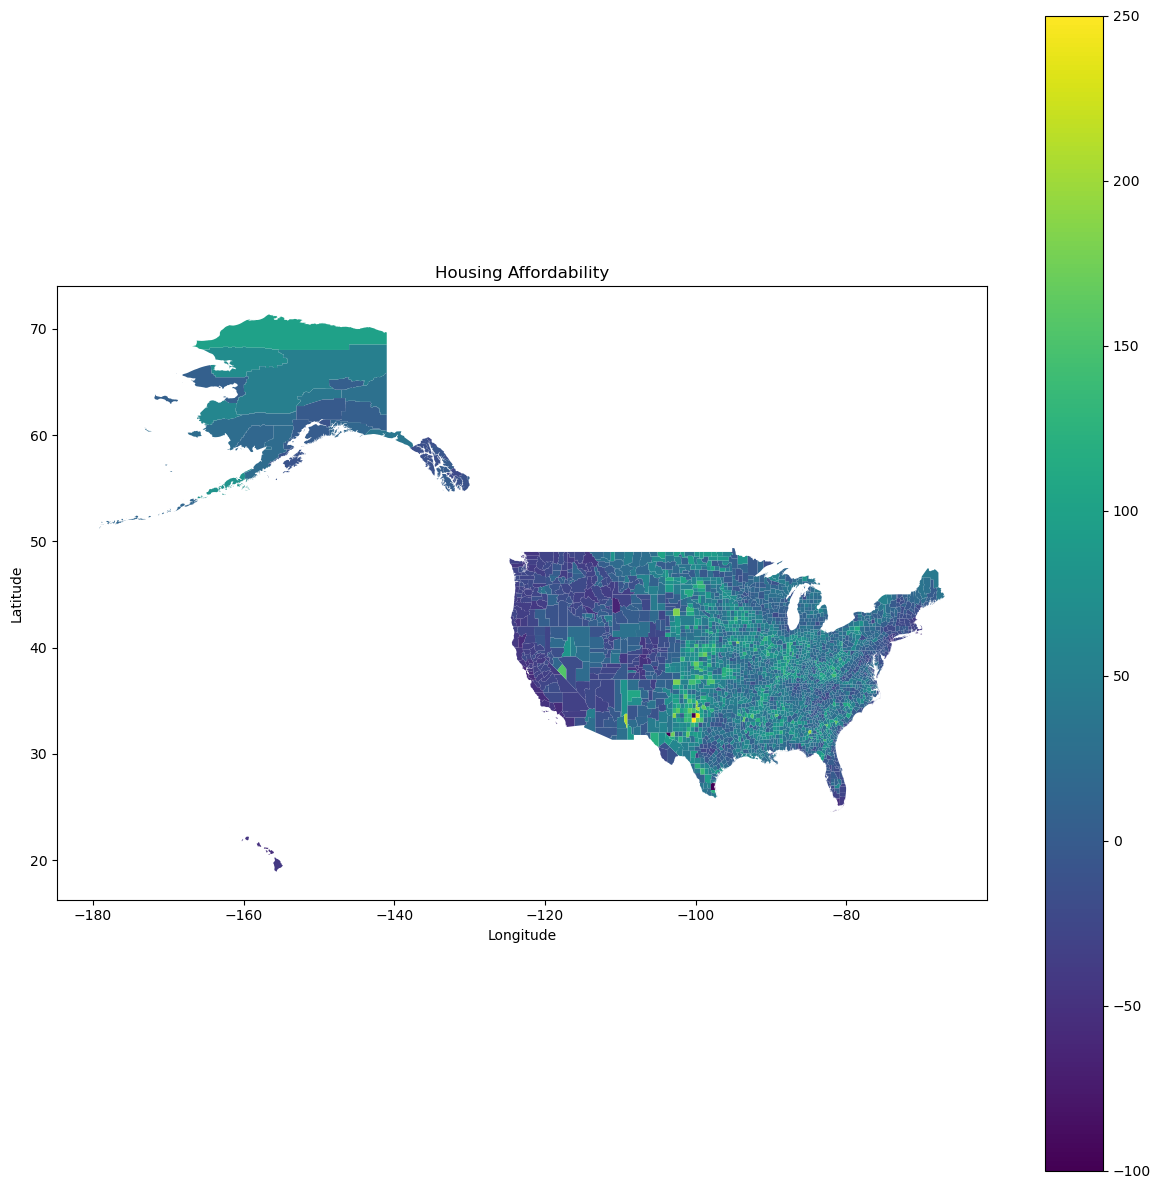

In [15]:
dem_gdf.plot(figsize=(15, 15), column='HAI_CY', legend=True)
plt.title('Housing Affordability')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

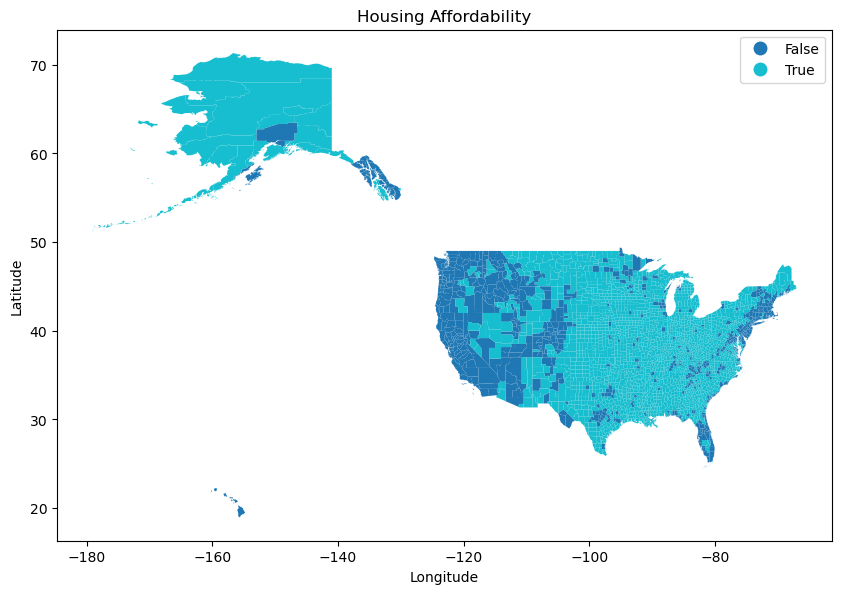

In [16]:
dem_gdf.plot(figsize=(10, 10), column='HAI_B', legend=True)
plt.title('Housing Affordability')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

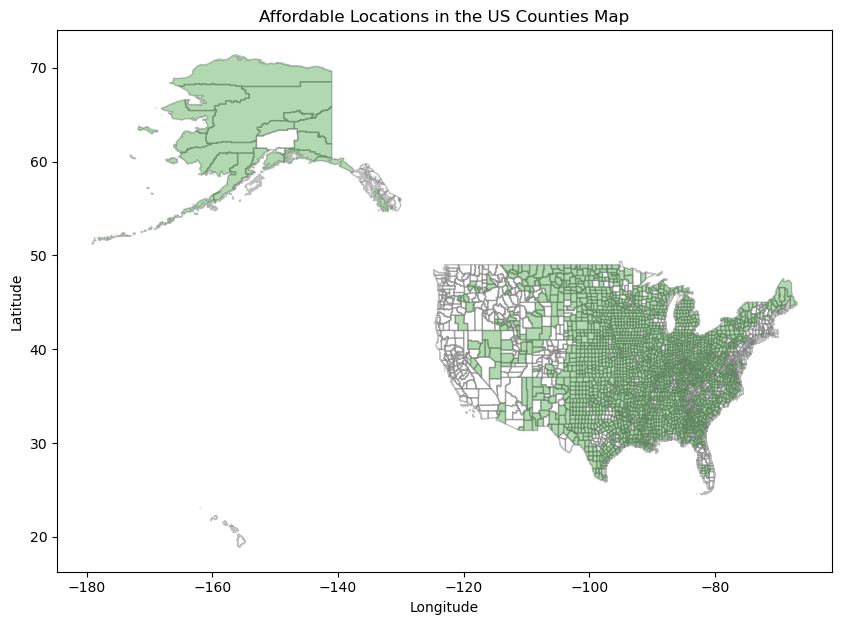

In [17]:
# Define regions with high affordability
dem_gdf['focus_afford'] = dem_gdf['HAI_B'] == True

# Filter locations where 'HAI_B' is TRUE
focus_afford = dem_gdf[dem_gdf['HAI_B']]

# Plot all US counties
fig, ax = plt.subplots(figsize=(10, 10))
dem_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5)

# Plot locations with focus_affordability in green
focus_afford.plot(ax=ax, color='green', alpha=0.3)

plt.title('Affordable Locations in the US Counties Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations
- **Focus**: Middle and Eastern States in the US are most affordable
- West Coast States are least affordable

### Exploring Vacanacy in the US

In [18]:
# Designed vacancy percentage variable for analysis
dem_gdf['VACANT_PCT'] = (dem_gdf.VACANT_CY / dem_gdf.TOTHU_CY).apply(float)

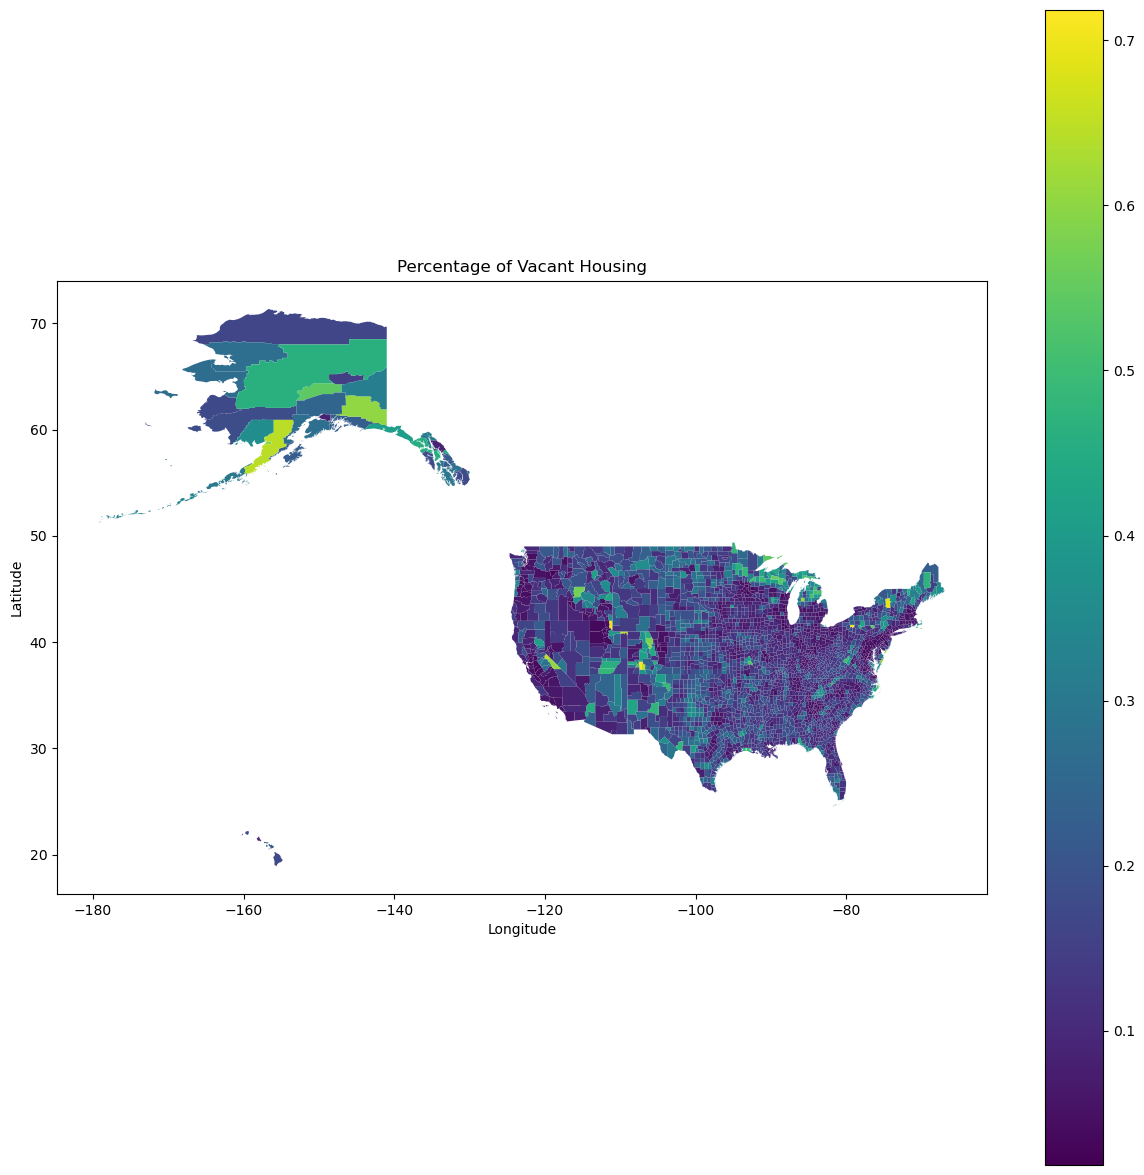

In [19]:
dem_gdf.plot(figsize=(15, 15), column='VACANT_PCT', legend=True)
plt.title('Percentage of Vacant Housing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: ylabel='Frequency'>

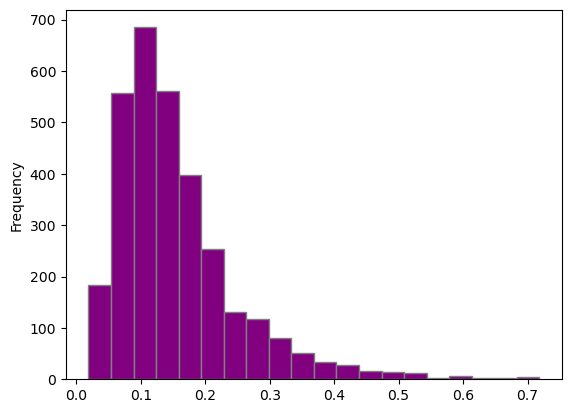

In [20]:
# Determine vacancy bins
dem_gdf['VACANT_PCT'].plot.hist(bins=20, color='purple', edgecolor='grey')

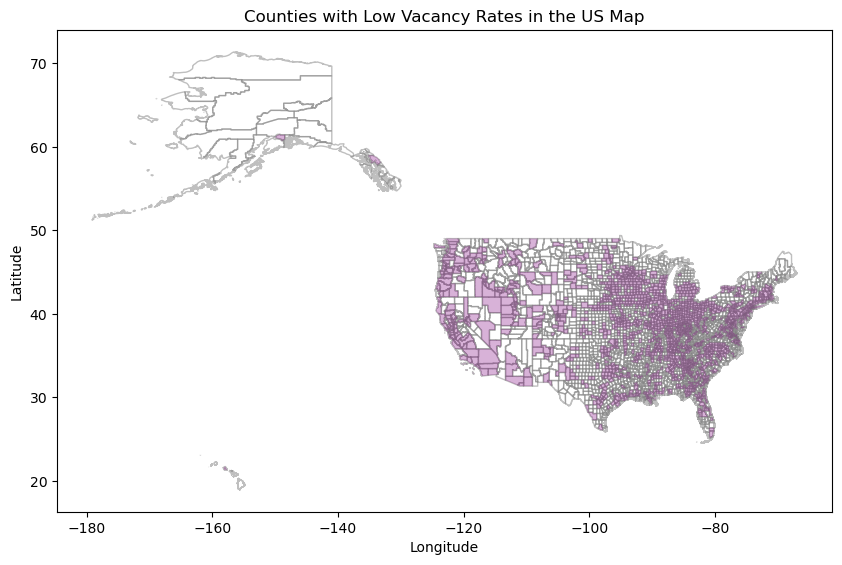

In [21]:
# Define regions with low vacancy rate as preferred
dem_gdf['focus_vacancy'] = dem_gdf['VACANT_PCT'] < dem_gdf['VACANT_PCT'].median()

# Filter locations where 'HAI_B' is TRUE
focus_vacancy = dem_gdf[dem_gdf['focus_vacancy']]

# Plot all US counties
fig, ax = plt.subplots(figsize=(10, 10))
dem_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5)

# Plot locations with focus_affordability in green
focus_vacancy.plot(ax=ax, color='purple', alpha=0.3)

plt.title('Counties with Low Vacancy Rates in the US Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations:
- California and central East states such as Indiana, Chicago seem to have lower vacancy rates
   - lower vacancy is good because it shows high demand for rental properties 
- Alaska seems to have higher vacancy

### Exploring Unemployment in the US

In [22]:
# Design unemployment variable
dem_gdf['UNEMPRT_CY'] = dem_gdf.UNEMPRT_CY.apply(float)

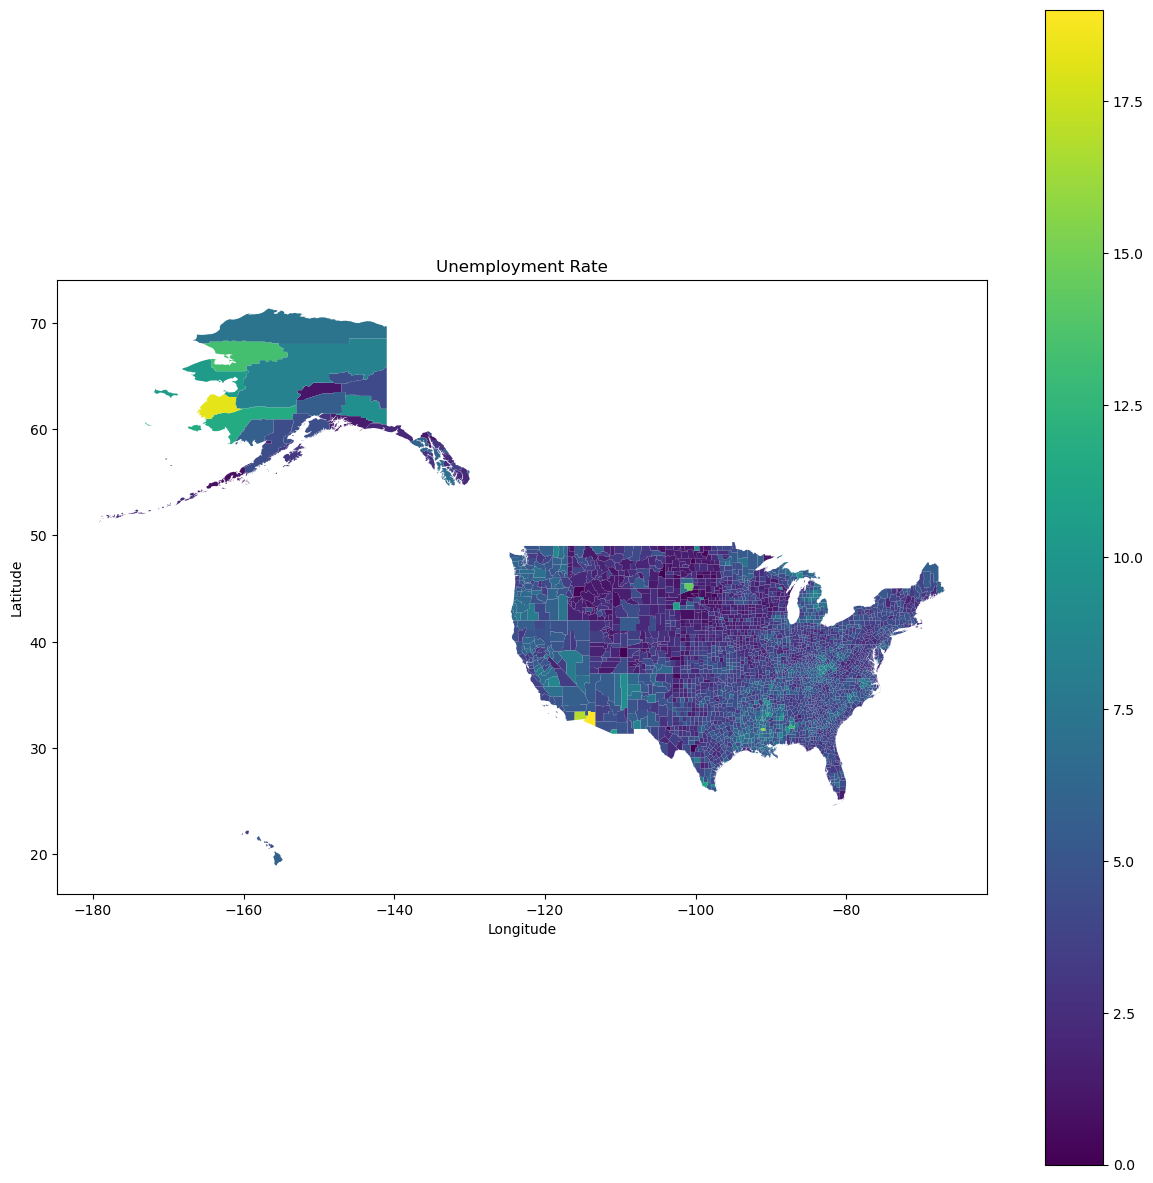

In [23]:
dem_gdf.plot(figsize=(15, 15), column='UNEMPRT_CY', legend=True)
plt.title('Unemployment Rate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: ylabel='Frequency'>

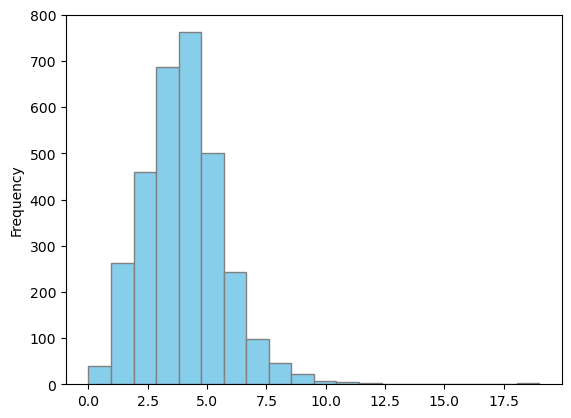

In [24]:
dem_gdf['UNEMPRT_CY'].plot.hist(bins=20, color='skyblue', edgecolor='grey')

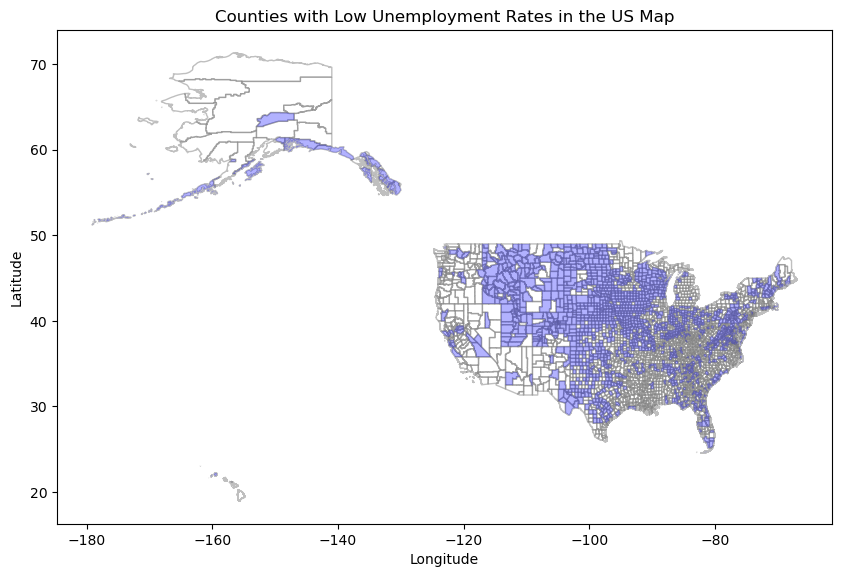

In [25]:
# Define regions with low unemployment as preferred
dem_gdf['focus_employ'] = dem_gdf['UNEMPRT_CY'] < dem_gdf['UNEMPRT_CY'].median()

# Filter locations
focus_employ= dem_gdf[dem_gdf['focus_employ']]

# Plot all US counties
fig, ax = plt.subplots(figsize=(10, 10))
dem_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5)

# Plot locations with focus_employment in green
focus_employ.plot(ax=ax, color='blue', alpha=0.3)

plt.title('Counties with Low Unemployment Rates in the US Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations: 
- Northern-Central regions have the least unemployment
- West Coast Regions suffer from the highest unemployment

### Exploring Income Growth in the US

In [26]:
# float
dem_gdf['PCIGRWCYFY'] = dem_gdf.PCIGRWCYFY.apply(float)

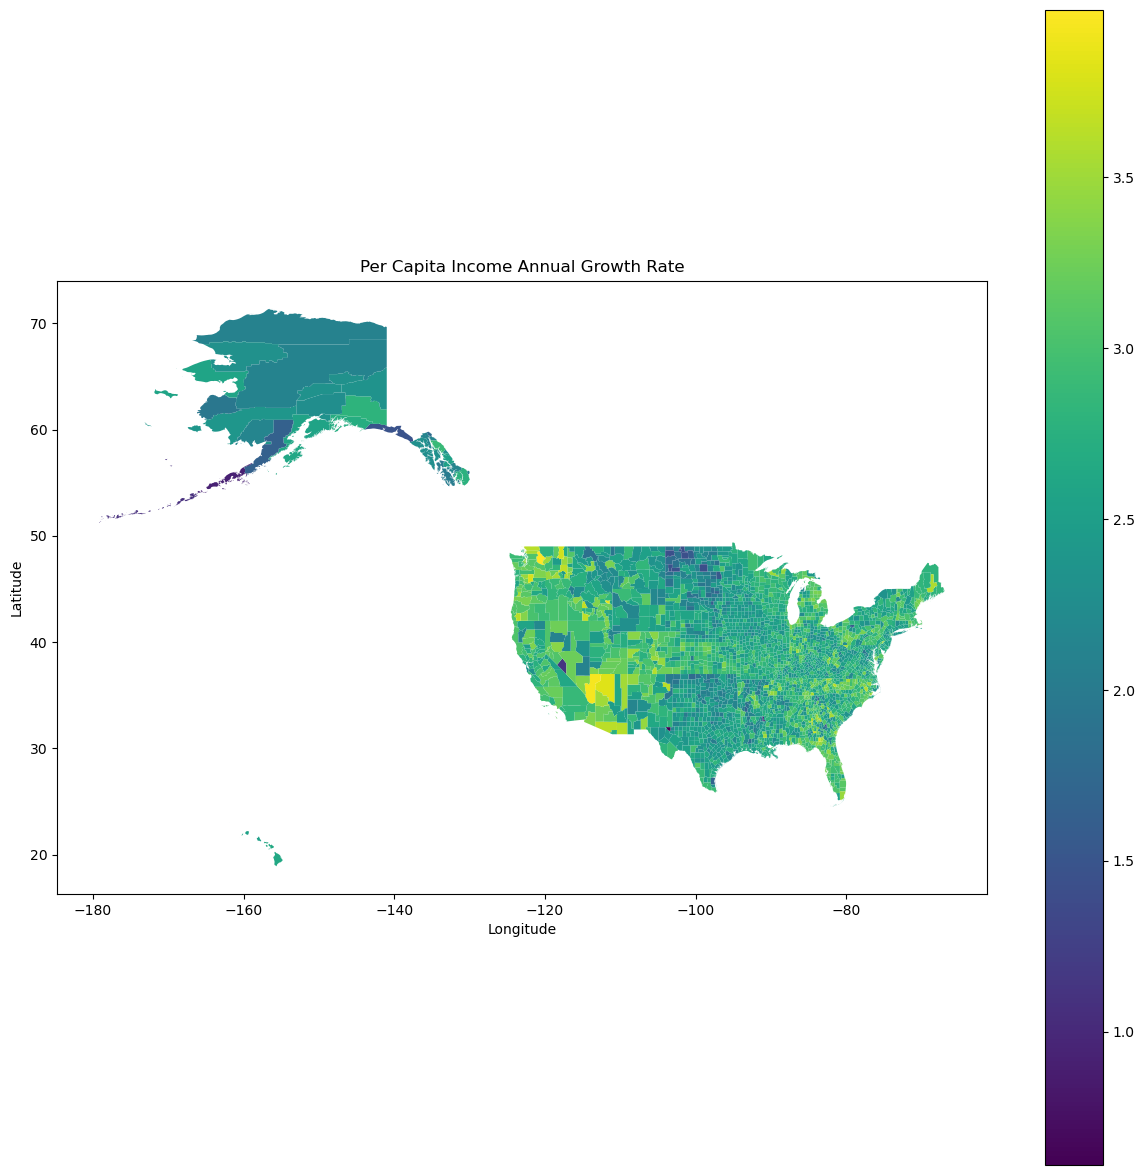

In [27]:
dem_gdf.plot(figsize=(15, 15), column='PCIGRWCYFY', legend=True)
plt.title('Per Capita Income Annual Growth Rate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

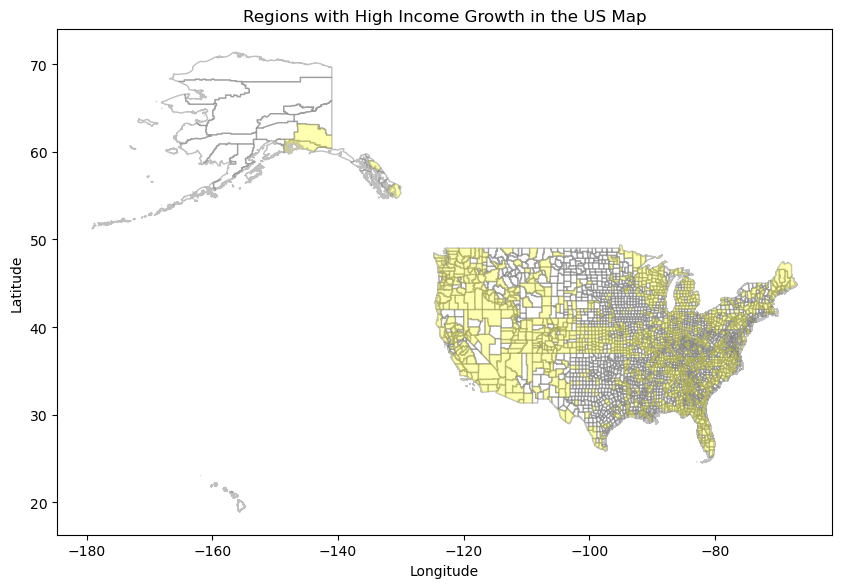

In [28]:
# Define regions with high income growth as preferred
dem_gdf['focus_income'] = dem_gdf['PCIGRWCYFY'] > dem_gdf['PCIGRWCYFY'].median()

# Filter locations
focus_income = dem_gdf[dem_gdf['focus_income']]

# Plot all US counties
fig, ax = plt.subplots(figsize=(10, 10))
dem_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5)

# Plot locations with focus_employment in green
focus_income.plot(ax = ax, color= 'yellow', alpha=0.3)

plt.title('Regions with High Income Growth in the US Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Exploring Violent Crime Rate in the US

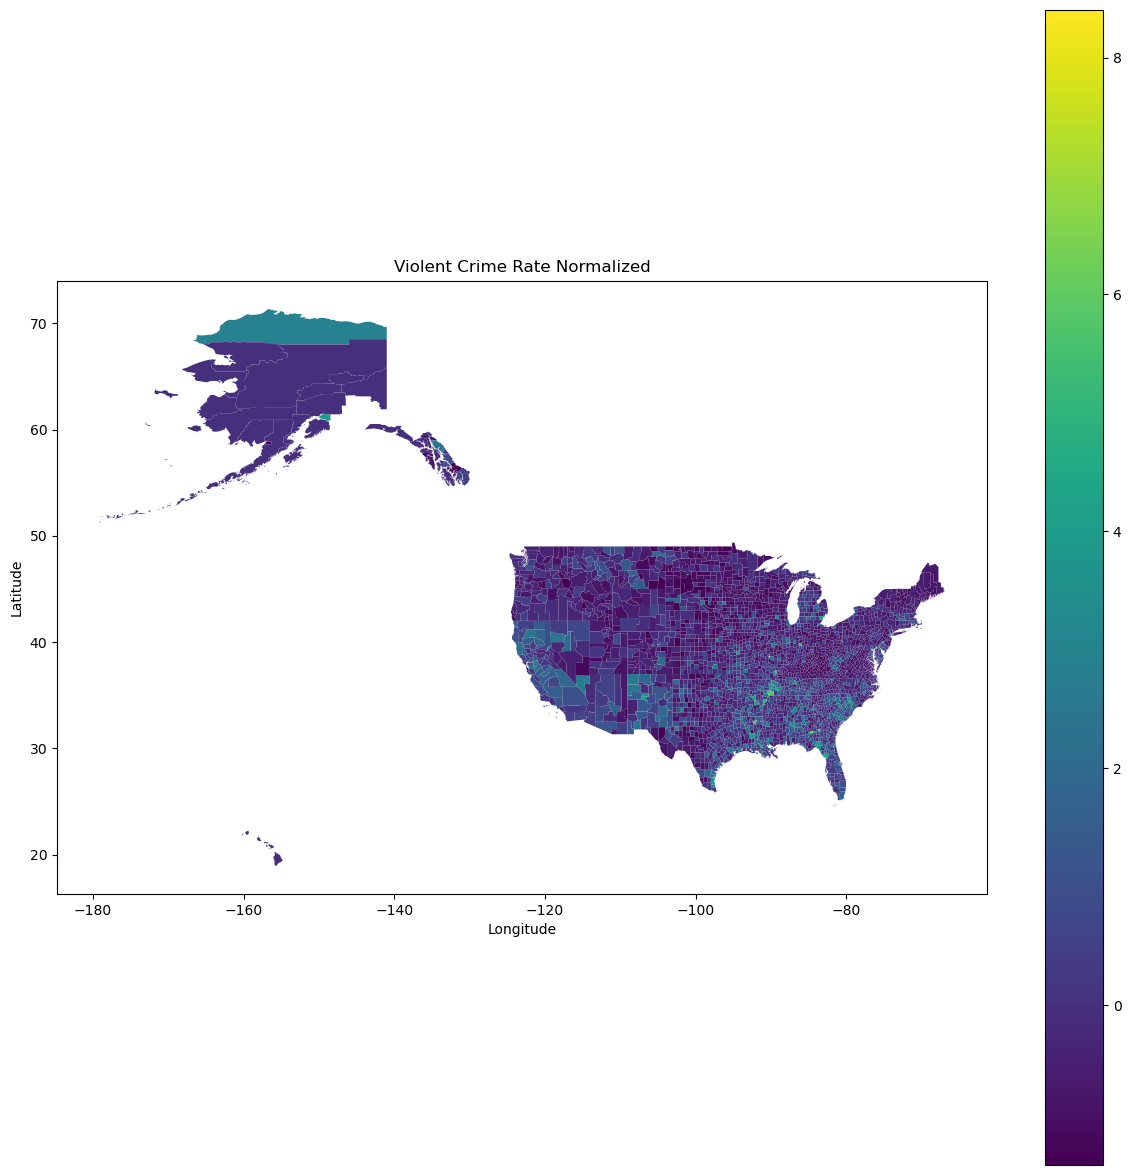

In [29]:
dem_gdf['v043_rawvalue'] = dem_gdf.v043_rawvalue.apply(float)

dem_gdf.plot(figsize=(15, 15), column='v043_rawvalue',legend=True)
plt.title('Violent Crime Rate Normalized')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

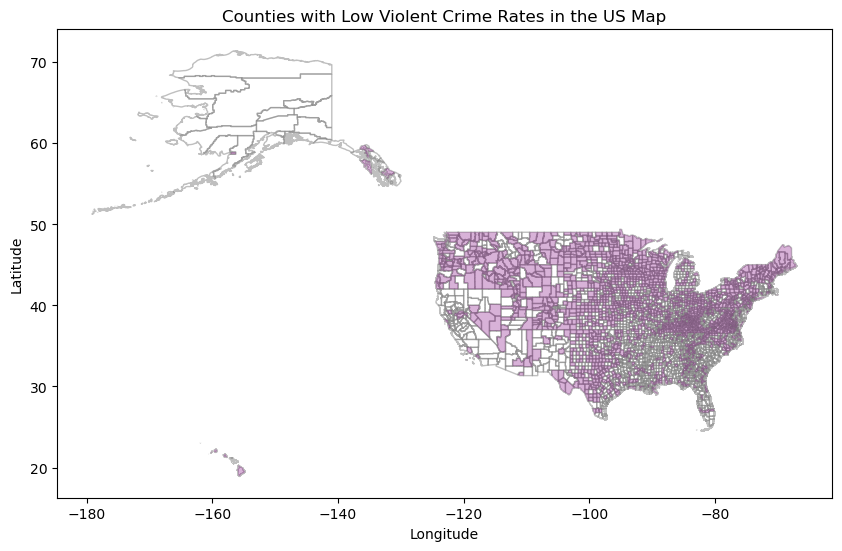

In [30]:
# Define regions with low violent crime rate as preferred
dem_gdf['focus_crime'] = dem_gdf.v043_rawvalue < 0

# Filter locations where 'focus_v043' is TRUE
focus_crime = dem_gdf[dem_gdf['focus_crime']]

# Plot all US counties
fig, ax = plt.subplots(figsize=(10, 10))
dem_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5, legend=True)

# Plot locations with focus_affordability in green
focus_crime.plot(ax=ax, color='purple', alpha=0.3)

plt.title('Counties with Low Violent Crime Rates in the US Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations:
-  Northern states seem to have a lower crime rate

### Exploring Highschool Graduation Rate in the US

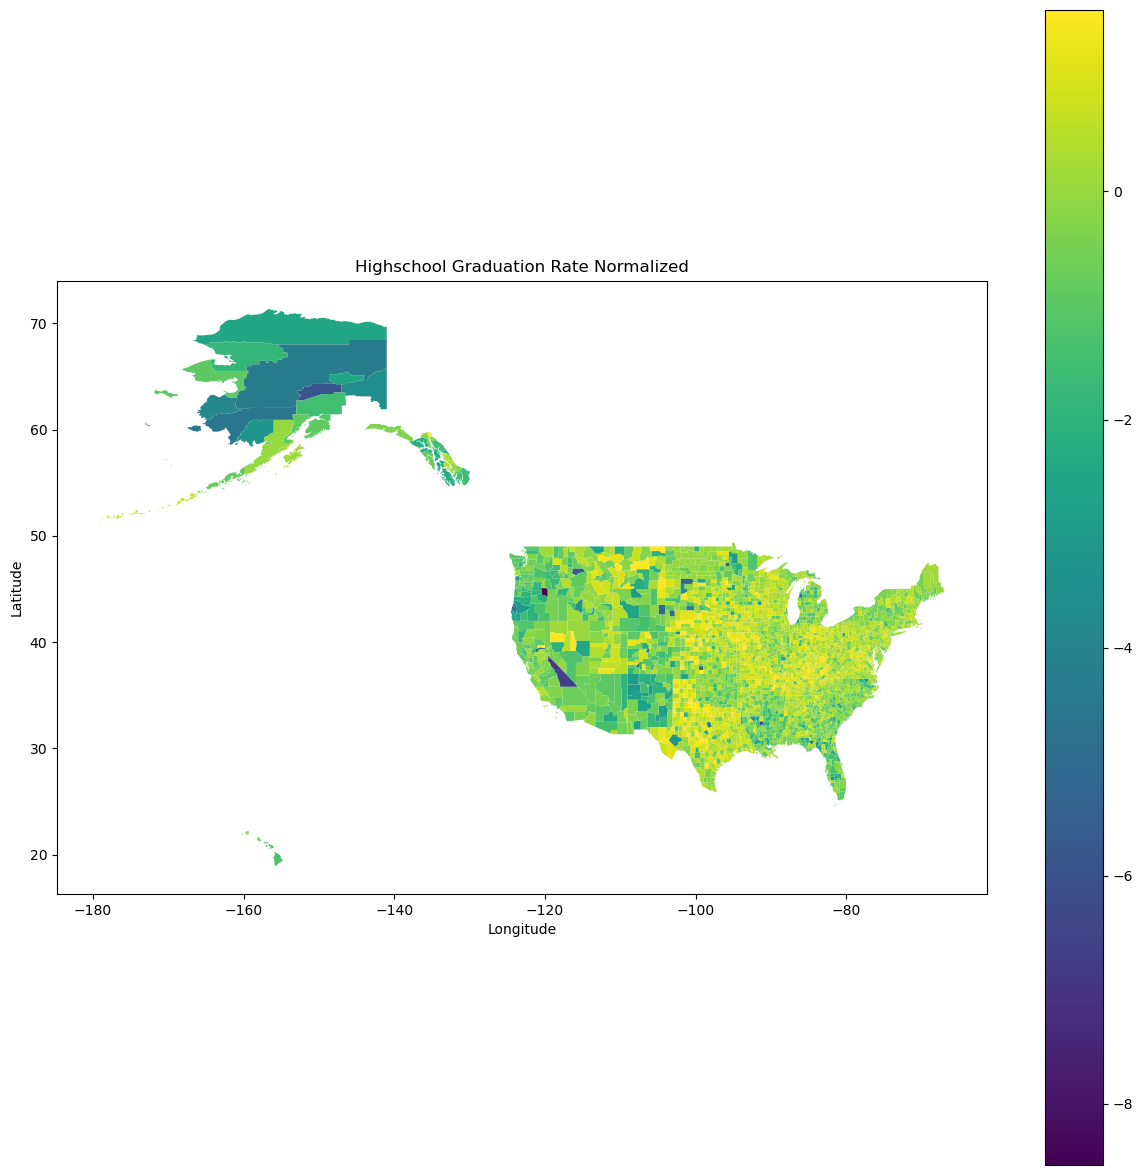

In [31]:
dem_gdf['v021_rawvalue'] = dem_gdf.v021_rawvalue.apply(float)

dem_gdf.plot(figsize=(15, 15), column='v021_rawvalue',legend=True)
plt.title('Highschool Graduation Rate Normalized')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

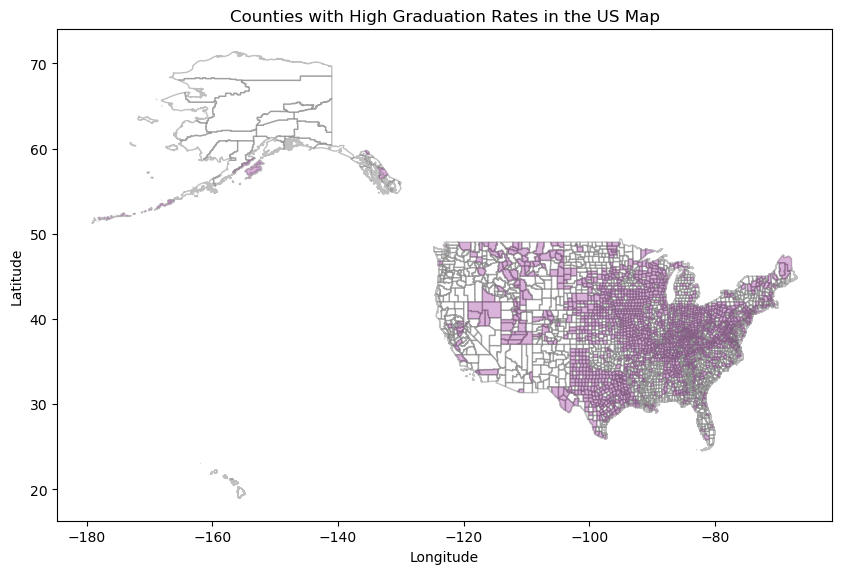

In [32]:
# Define regions with high graduation rate as preferred
dem_gdf['focus_grad'] = dem_gdf.v021_rawvalue > 0

# Filter locations where 'focus_v043' is TRUE
focus_grad = dem_gdf[dem_gdf['focus_grad']]

# Plot all US counties
fig, ax = plt.subplots(figsize=(10, 10))
dem_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5, legend=True)

# Plot locations with focus_affordability in green
focus_grad.plot(ax=ax, color='purple', alpha=0.3)

plt.title('Counties with High Graduation Rates in the US Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations: 
- The mid-west seem to have higher graduation rates compared to Western states

## Analysis

**Columns in dem_gdf:** 
- temp = "Year_TAVG_F"
- affordability = "HAI_CY"
- vacancy = "VACANT_PCT"
- unemployment = "UNEMPRT_CY"
- income growth = "PCIGRWCYFY"
- violent crime rate = "v043_rawvalue"
- highschool graduation rate = "v021_rawvalue"

**Created Focus Layers**
- focus_climate
- focus_afford
- focus_vacancy
- focus_employ
- focus_income
- focus_crime
- focus_grad

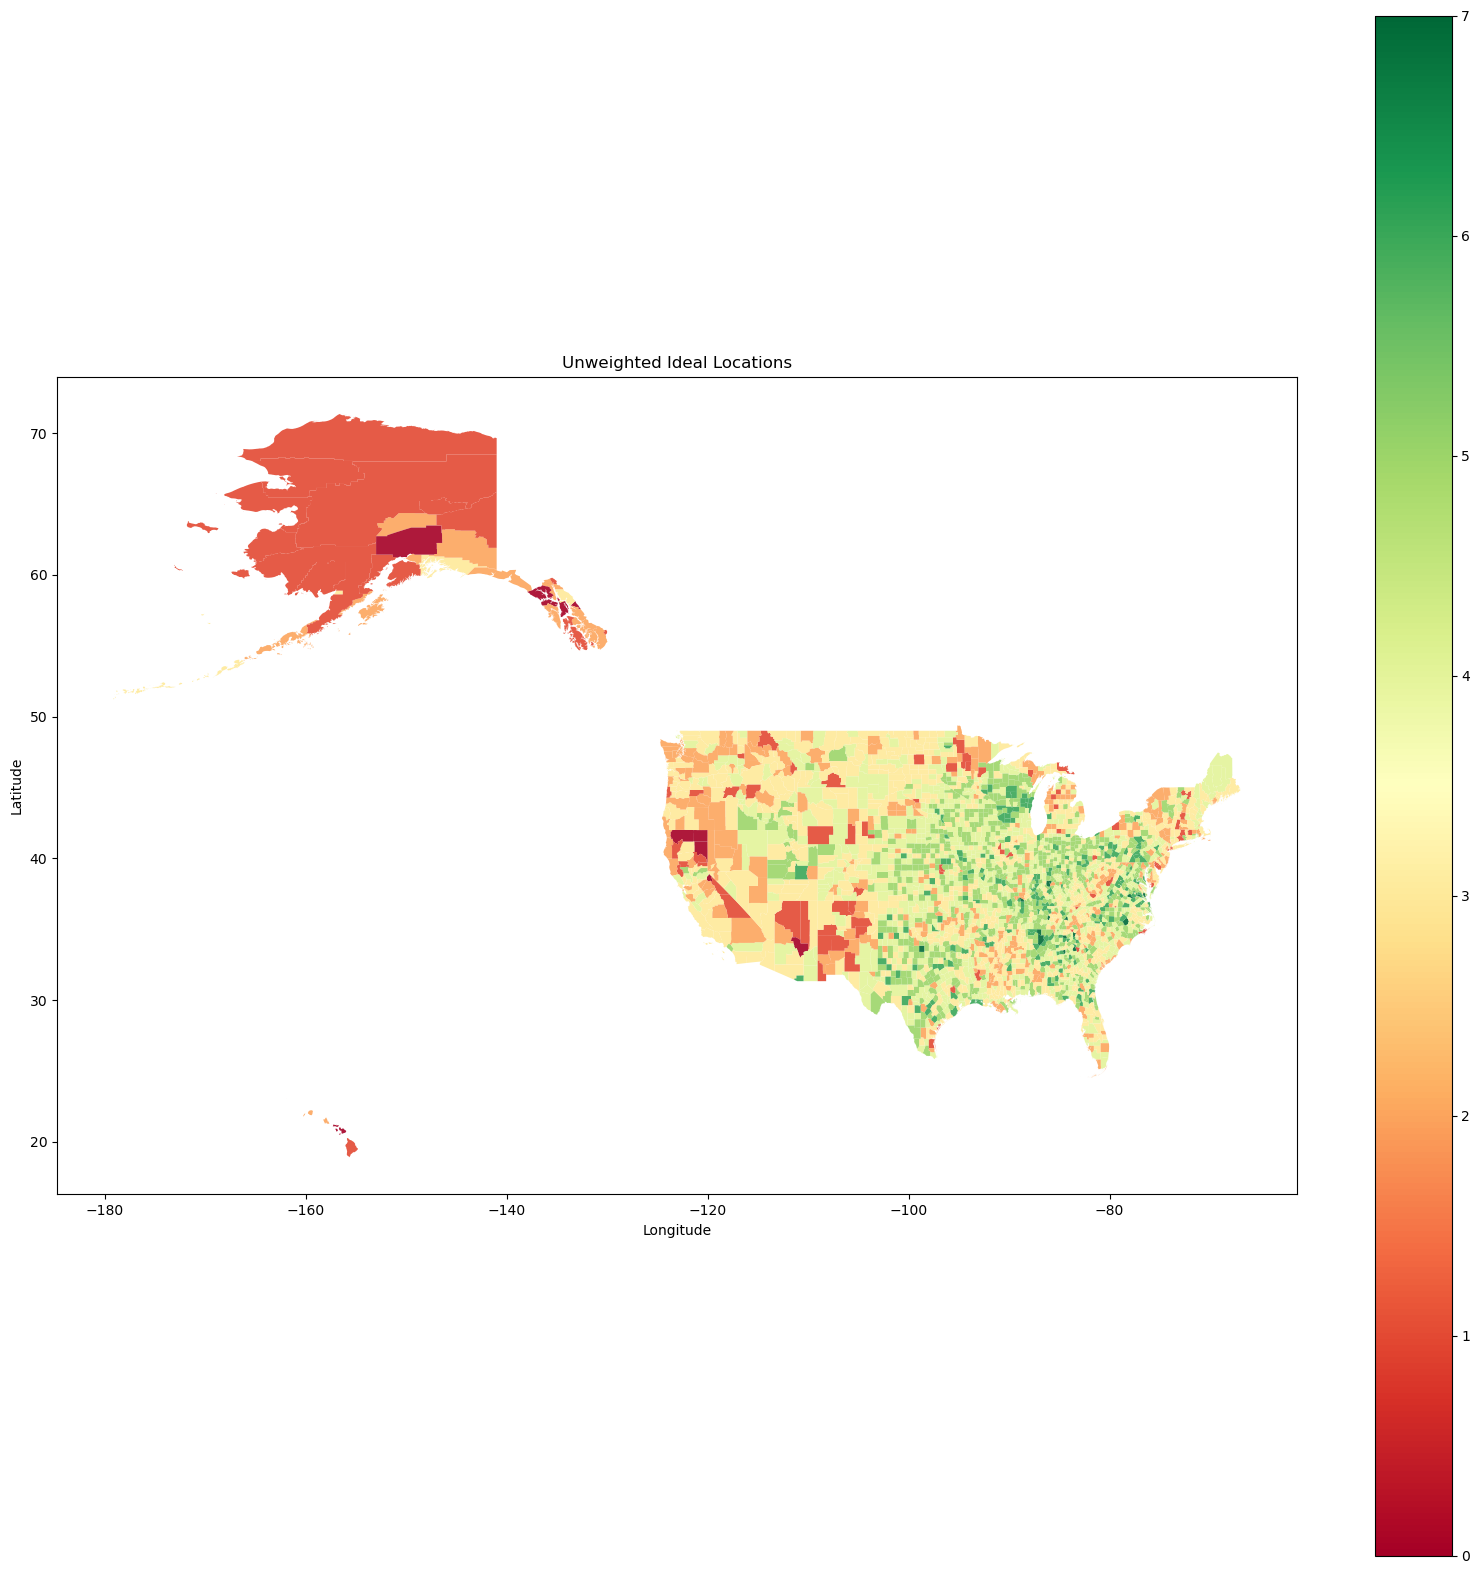

In [44]:
focus = ['focus_climate', 'focus_afford', 'focus_vacancy', 'focus_employ',
                          'focus_income', 'focus_crime', 'focus_grad']
# Calculate overlap count for all rows at once
overlap_counts = dem_gdf[focus].sum(axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(20,20))

# Plot polygons with different shades based on the number of true values
dem_gdf.plot(ax=ax, column=overlap_counts, cmap='RdYlGn', alpha= .9, legend=True)

plt.title('Unweighted Ideal Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [70]:
# Get top 100 counties --> find overall suitable states
top_indices = overlap_counts.sort_values(ascending=False).index[:100]
dem_gdf['top_100'] = dem_gdf.index.isin(top_indices)

# Which states?
dem_gdf[dem_gdf.top_100].STATE_NAME.value_counts()[:10]

STATE_NAME
Virginia          22
Texas             16
Kentucky          14
North Carolina     8
Georgia            6
Indiana            6
Ohio               6
Tennessee          5
Florida            4
Kansas             4
Name: count, dtype: Int64

- If all 7 factors were weighted equally and divided between suitable and not suitable: we found that the following states contain the most well-rounded counties to reside in: 
    - Virginia
    - Texas
    - Kentucky
    - North Carolina
    - Georgia

In [68]:
# Get top 100 counties
top_indices = overlap_counts.sort_values(ascending=False).index[:100]
dem_gdf['top_100'] = dem_gdf.index.isin(top_indices)

# Which states?
dem_gdf[dem_gdf.top_100].STATE_NAME.value_counts()

STATE_NAME
Virginia          22
Texas             16
Kentucky          14
North Carolina     8
Georgia            6
Indiana            6
Ohio               6
Tennessee          5
Florida            4
Kansas             4
Alabama            3
Pennsylvania       2
Louisiana          1
Nebraska           1
New York           1
Utah               1
Name: count, dtype: Int64

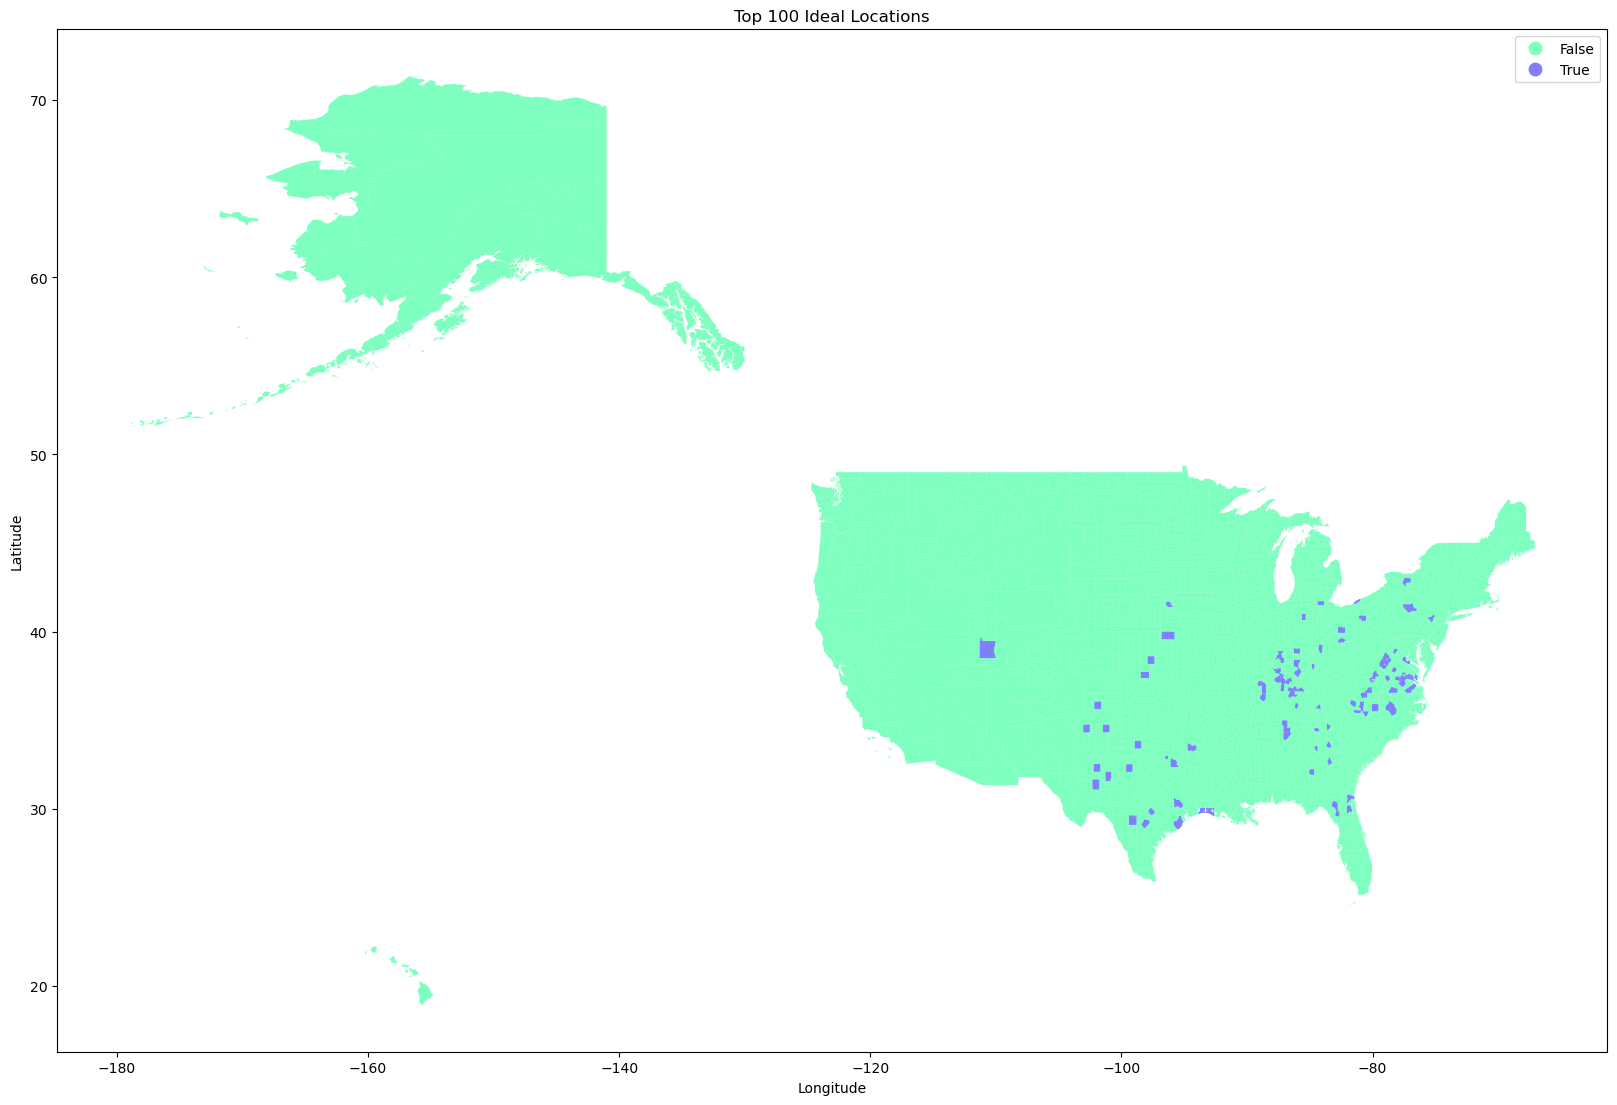

In [35]:
# plot top_100
fig, ax = plt.subplots(figsize=(20,20))

dem_gdf.plot(ax=ax, column='top_100', cmap='winter_r', alpha= 0.5, legend=True)

plt.title('Top 100 Ideal Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Weighted Model

First, we want to run an Analytical Hierarchy Process (AHP), to identify which factors are more or less important. This will be implemented by a pairwise comparison, and weights will be assigned by a percentage of total weights.

In [36]:
ahp_dict = {}
# manual pairwise comparison
ahp_dict['focus_climate'] = [1, 0, 0, 0, 1, 0, 1]
ahp_dict['focus_afford'] = [1, 1, 1, 1, 1, 1, 1]
ahp_dict['focus_vacancy'] = [1, 0, 1, 0, 1, 1, 1]
ahp_dict['focus_employ'] = [1, 0, 1, 1, 1, 1, 1]
ahp_dict['focus_income'] = [0, 0, 0, 0, 1, 0, 1]
ahp_dict['focus_crime'] = [1, 0, 0, 0, 1, 1, 1]
ahp_dict['focus_grad'] = [0, 0, 0, 0, 0, 0, 1]
# get weights
for key in ahp_dict.keys():
    ahp_dict[key] = sum(ahp_dict[key])
ahp_sum = sum(ahp_dict.values())
for key in ahp_dict.keys():
    ahp_dict[key] = ahp_dict[key] / ahp_sum
ahp_dict

{'focus_climate': 0.10714285714285714,
 'focus_afford': 0.25,
 'focus_vacancy': 0.17857142857142858,
 'focus_employ': 0.21428571428571427,
 'focus_income': 0.07142857142857142,
 'focus_crime': 0.14285714285714285,
 'focus_grad': 0.03571428571428571}

- Initializes a dictionary `ahp_dict` with pairwise comparison values representing the relative importance of each factor
- Computes the weights for each factor by summing the pairwise comparison values normalizing the sum to obtain a weight value
- Returns the dictionary `ahp_dict` containing the calculated AHP weights for each criterion, where the keys represent the factor and the values represent their corresponding normalized weights

- Model weights in order from most prioritized --> least prioritized:
    - focus_afford: 0.25
    - focus_employ: 0.21428571428571427
    - focus_vacancy: 0.17857142857142858
    - focus_crime: 0.14285714285714285
    - focus_climate: 0.10714285714285714
    - focus_income: 0.07142857142857142
    - focus_grad: 0.03571428571428571

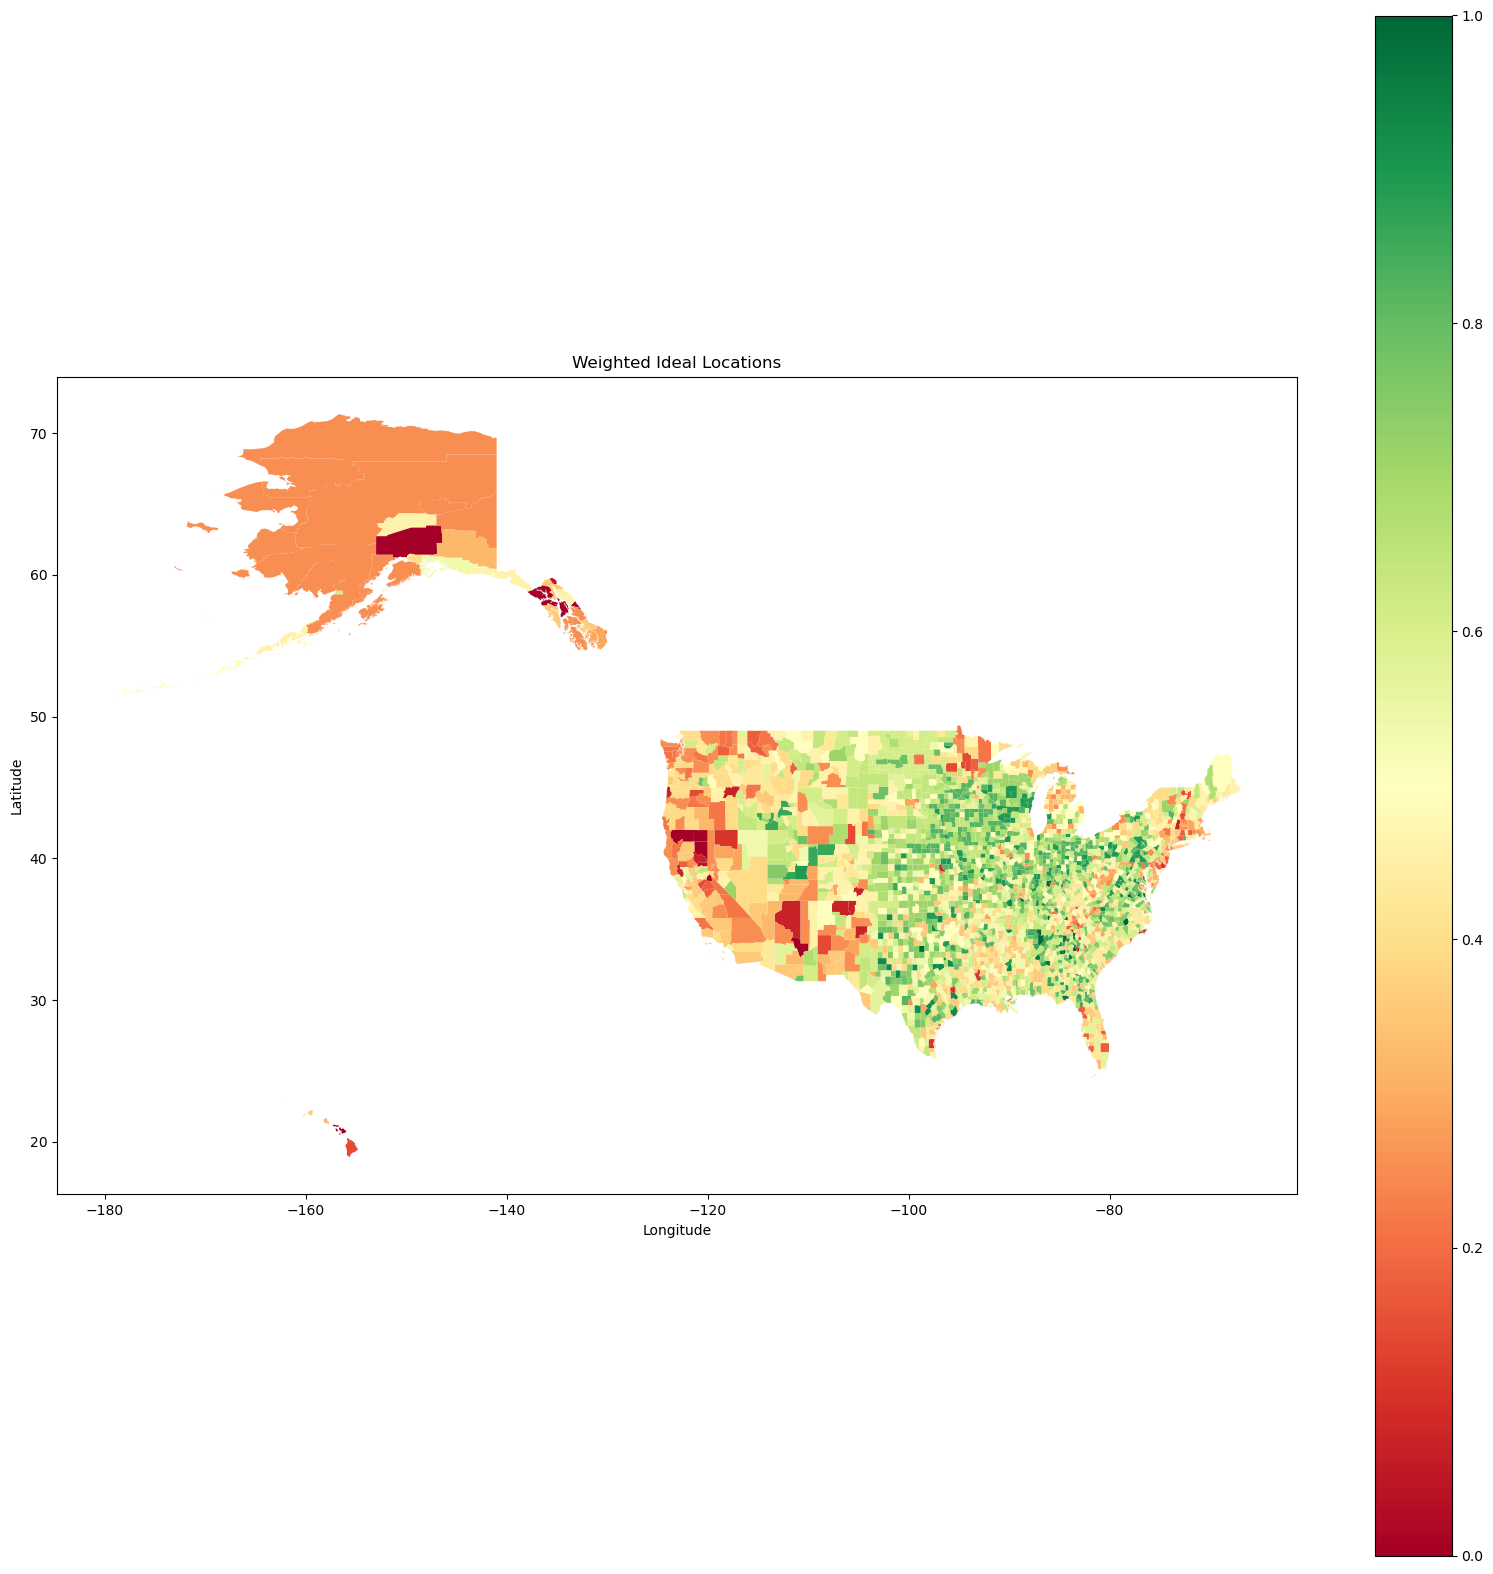

In [37]:
# apply weights
weighted_overlap = dem_gdf[focus].apply(lambda x: x * list(ahp_dict.values()), axis=1)
weighted_overlap = weighted_overlap.sum(axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(20,20))

# Plot polygons with different shades based on the number of true values
dem_gdf.plot(ax=ax, column=weighted_overlap, cmap='RdYlGn', alpha= 1, legend=True)

plt.title('Weighted Ideal Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

- Our resulting map with weighted factors makes it more clear which regions should be prioritized compared to our our unweighted focus factor map 

In [38]:
# get top 100 counties
top_indices = weighted_overlap.sort_values(ascending=False).index[:100]
dem_gdf['top_100_w'] = dem_gdf.index.isin(top_indices)

# Which states?
dem_gdf[dem_gdf.top_100_w].STATE_NAME.value_counts()

STATE_NAME
Texas             17
Pennsylvania      11
Georgia           10
Missouri           9
Virginia           8
Ohio               7
Wisconsin          7
Kentucky           5
Alabama            5
Indiana            3
Kansas             3
Mississippi        2
Nebraska           2
North Carolina     2
Oklahoma           2
Tennessee          2
Michigan           1
Minnesota          1
Florida            1
New York           1
Maryland           1
Name: count, dtype: Int64

- Based on our weighted model, we find that the following states have the most counties with the prioritized factors: 
    - Texas
    - Pennylvania
    - Georgia
    - Missouri
    - Virginia

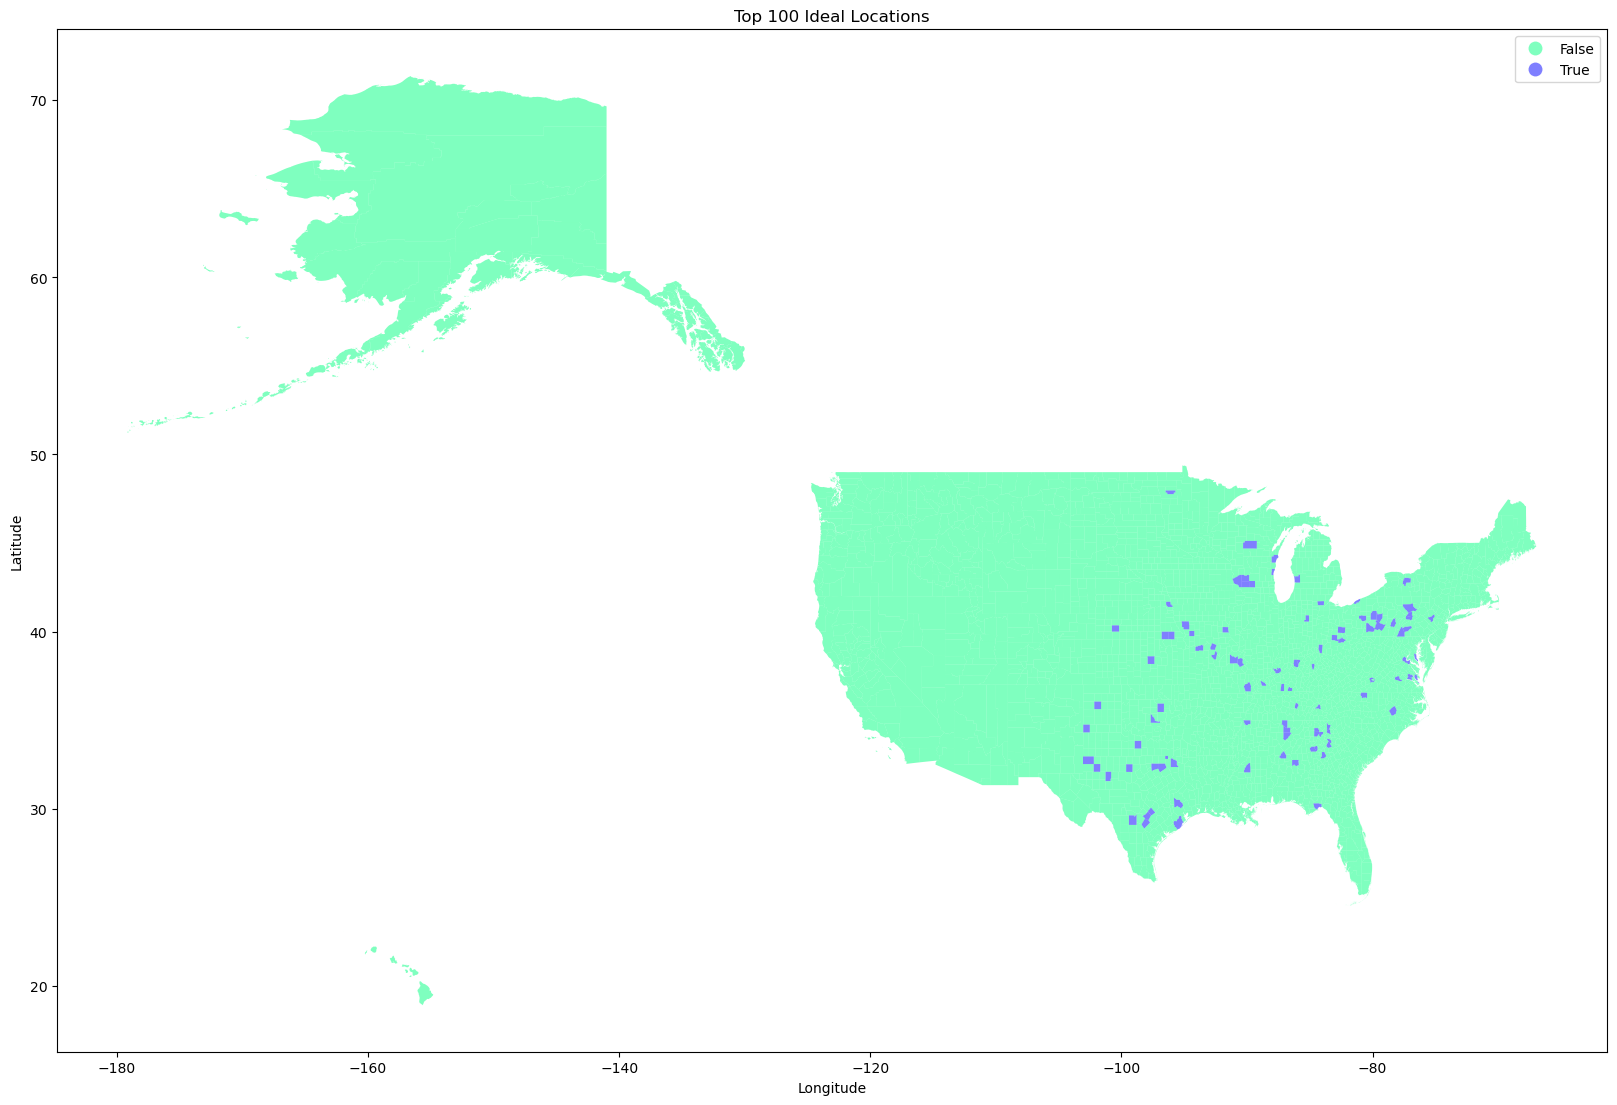

In [39]:
# plot top_100_w
fig, ax = plt.subplots(figsize=(20,20))

dem_gdf.plot(ax=ax, column='top_100_w', cmap='winter_r', alpha= 0.5, legend=True)

plt.title('Top 100 Ideal Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

- We can see a clear division between the Eastern and Western when applying more weight on financial factors
    - Eastern States have more affordable counties for living

In [40]:
# find counties in both models
dem_gdf['top_100_both'] = dem_gdf['top_100'] & dem_gdf['top_100_w']
dem_gdf[dem_gdf.top_100_both].STATE_NAME.value_counts() / dem_gdf[dem_gdf.top_100_both].shape[0]

STATE_NAME
Texas             0.254902
Virginia          0.137255
Ohio              0.117647
Kentucky          0.098039
Georgia           0.078431
Alabama           0.058824
Kansas            0.058824
Indiana           0.039216
North Carolina    0.039216
Pennsylvania      0.039216
Tennessee         0.039216
Nebraska          0.019608
New York          0.019608
Name: count, dtype: Float64

## Summary of Results

From our anlalysis we found that the top 5 states due to the fact that they have the most counties inside that address all housing factors include Texas, Virgina, Ohio, Kentucky, and Georgia. 


We can visualize our results clearly through the following map that illustrates counties with the best statistical record extracting top performing states from our weighted and unweigjted models concerning climate, vacancy, affordability, unemployment, Income Growth Rate, Violent Crime Rate, and HS graduation rate.

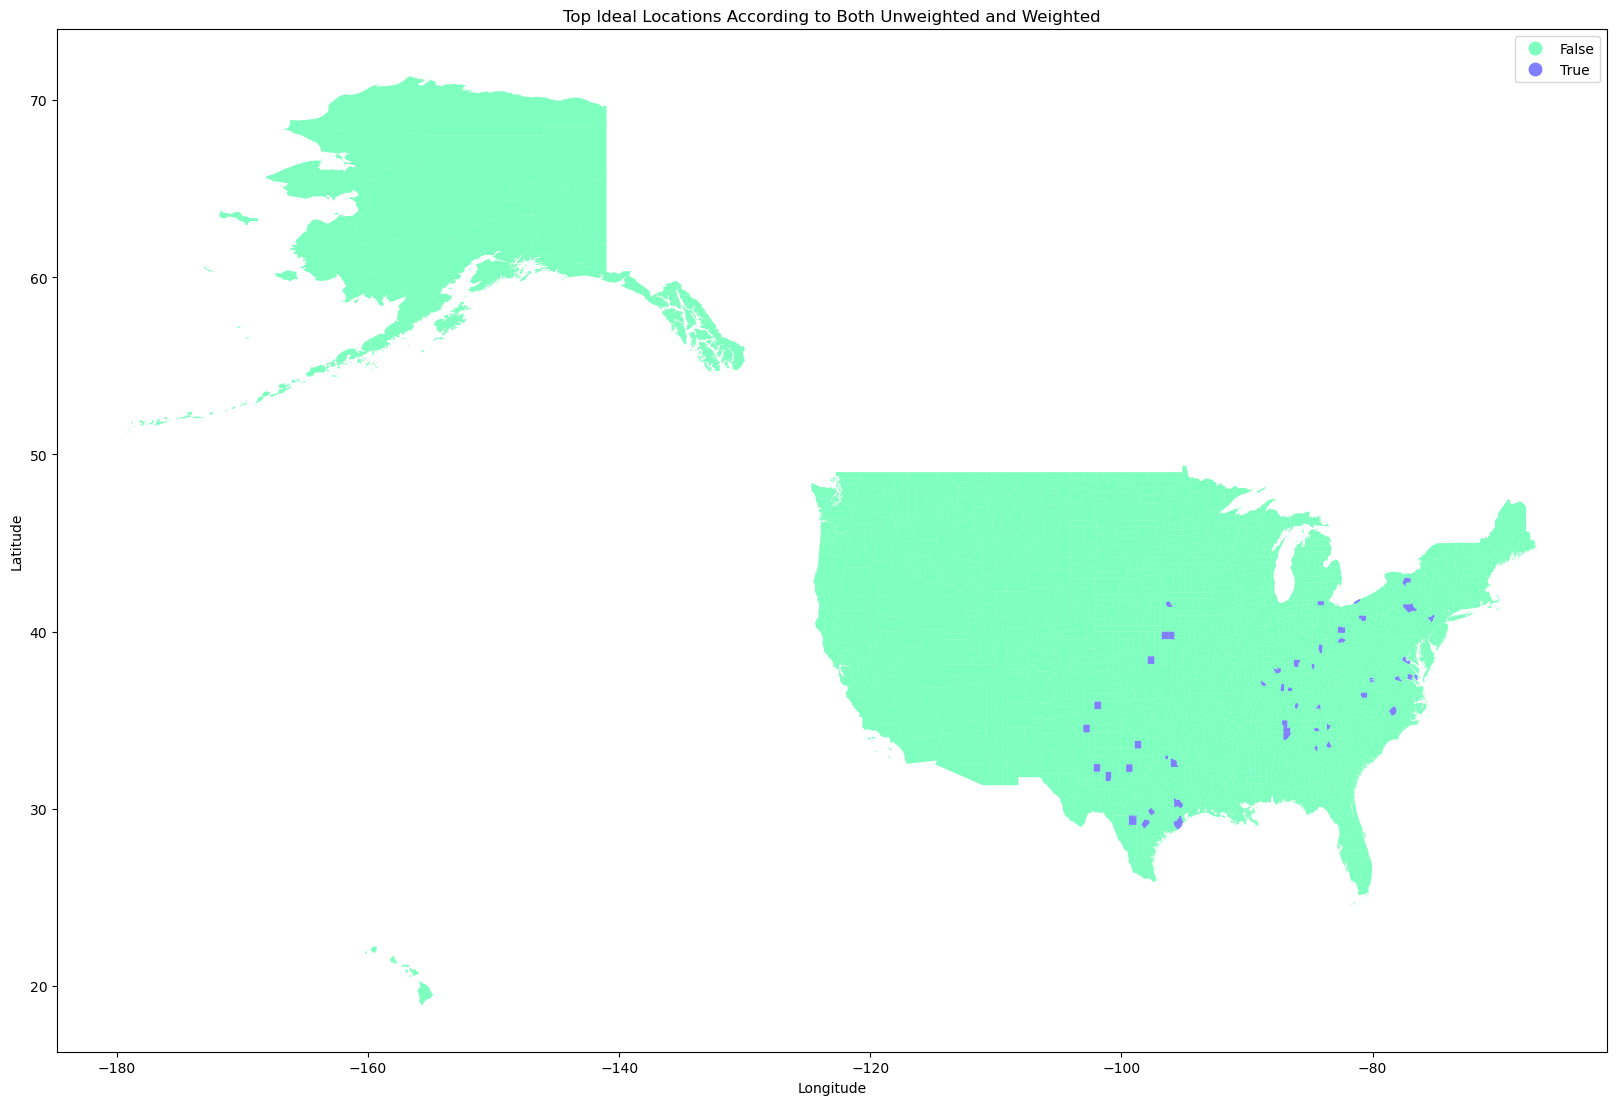

In [77]:
# plot top_100_both
fig, ax = plt.subplots(figsize=(20,20))

dem_gdf.plot(ax=ax, column='top_100_both', cmap='winter_r', alpha= 0.5, legend=True)

plt.title('Top Ideal Locations According to Both Unweighted and Weighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The states of Texas, Virginia, Ohio, Kentucky, and Georgia boast counties that excel in a myriad of favorable attributes including pleasant climates, minimal vacancy rates, high affordability, stable employment, high income growth, reduced crime incidences, and elevated high school graduation rates. In our weighted model, we prioritize factors like affordability and vacancy, recognizing their importance to many first-time homebuyers. The prominence of Eastern states in this weighted model aligns with the abundance of resources and land available, facilitating more accessible housing options for residents.

Factor observations:

- **Climate**: Southern bordering regions, known as the "Sunbelt," experience the warmest weather, with temperatures typically ranging from 65 to 75 degrees Fahrenheit. Conversely, Northern regions exhibit the coldest average temperatures, ranging from 40 to 45 degrees Fahrenheit.

- **Affordability**: Middle and Eastern states in the US emerge as the most affordable, while West Coast states tend to be the least affordable for housing.

- **Vacancy Rates**: California and central East states such as Indiana and Chicago demonstrate lower vacancy rates, indicating high demand for rental properties. In contrast, Alaska exhibits higher vacancy rates.

- **Unemployment**: Northern-Central regions boast the lowest unemployment rates, while the West Coast regions suffer from the highest rates of unemployment.

- **Crime Rates**: Northern states tend to have higher crime rates compared to other regions.

- **Education**: The Midwest states show higher graduation rates compared to Western states.


Relationship between certain factors:

- **Low Unemployment Rates and Violent Crime Rates:** Low unemployment rates signals a better economy with more job opportunities, dissuading individuals from resorting to criminal activities due to financial desperation. Consequently, regions with low unemployment rates tend to exhibit lower violent crime rates, reflecting the financial stability of their communities.
- **Income Growth and Vacancy:** Income growth typically relates to demand for housing as households aspire to enhance their living standards based on their financial outlook. Rising incomes often result in reduced vacancy rates as individuals gravitate towards better living accommodations. Conversely, stagnant or declining incomes may result in higher vacancy rates as financial constraints could cause relocation plans to more affordable/smaller properties

## Discussion

### 1) Findings in Relation to Literature Sources:

Our findings align closely with the literature sources we explored during the initial stages of our research. The identification of Texas, Virginia, Ohio, Kentucky, and Georgia as states with counties boasting favorable attributes such as pleasant climates, minimal vacancy rates, high affordability, stable employment, consistent income growth, reduced crime, and higher high school graduation rates coincides with the insights provided by sources like Fortune Builders. The article highlighted the importance of factors like housing affordability, job opportunities, and education quality in determining the desirability of a location for homebuyers, which our study confirmed through statistical analysis. Moreover, they ranked Georgia as #2 due to overall warm weather and financial growth. The article states that Atlanta has grown consistently at a rate of 1.5% per year. According to current projections, the workforce is expected to grow by 1.2 million people by the year 2050. This confirms our data as well. Moreover, the article ranks Texas as #4 best places to buy a house which may be a result of it's biggest city, Austin's,  real estate market with a local economy that is poised for a period of booming growth, and the availability of tax cuts to Samsung, Apple, and Tesla in exchange for opening major facilities which has provided not just jobs, but some of the best-paying jobs in the region.

Moreover, our observation regarding the relationship between low unemployment rates and reduced violent crime rates supports the notion discussed in literature that a robust economy with ample job opportunities tends to deter individuals from engaging in criminal activities due to financial stability. This finding resonates with the insights provided by sources like Money Crashers, which emphasized the significance of job opportunities and crime rates in influencing homebuyers'decisions.


### 2) Trade-offs and Decision Points:

In our analysis, we faced trade-offs in terms of the spatial resolution and scope of our analysis. While we focused on specific counties that helped us generalize into states known for their favorable attributes, such as Texas, Virginia, Ohio, Kentucky, and Georgia, we acknowledge that our findings may not capture the nuances of every locality within these regions and produced results based on states with the highest # of counties that met these criteria for homebuying we created. 

Furthermore, aggregating and weighting different factors in our weighted model  to derive composite scores for each region also required careful consideration of data quality, reliability, and relevance. However, we acknowledge the bias and limitations of our weighted model and make it open to personal preference as different factors can be weight more depending on preference.

Lastly, our data being from different sources may result in noise. However, we decided to do this in order to integrate more varibale factors into our model. 

## Conclusion and Future Work

While our analysis provides valuable insights into the factors influencing homebuyers' preferences and identifies regions with favorable attributes, if we had more time, we could incorporate more data and relevant factors such as migration patterns which we initially had trouble finding data for. 

Moreover, we can also extend our study to other geographical areas besides only the United States to learn global housing patterns. The results of our analysis are expected to be used by various homebuyers, developers, urban planners, policy makers, and researchers. Prospective homebuyers can use our findings to make informed decisions about where to invest in property based on their preferences and priorities. Real estate developers can use the insights to identify emerging markets and tailor their offerings to meet the demands of target demographics. Urban planners and policymakers can utilize the results to inform land-use planning, infrastructure development, and housing policy formulation by identifying regions with favorable attributes and areas in need of revitalization and in need of resource allocation and development. Researchers can build upon our analysis to conduct further investigations into specific aspects of housing market dynamics, socio-economic trends, and policy impacts. By fostering collaboration and knowledge exchange, our findings can contribute to a deeper understanding of the complex interactions shaping communities and economies, ultimately leading to more informed decision-making.